# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [41]:
!pip3 install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [42]:
%pip install python-dotenv


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from dbrepo.RestClient import RestClient
import os
from dotenv import load_dotenv, dotenv_values 
load_dotenv() 

client = RestClient(endpoint="https://test.dbrepo.tuwien.ac.at", username=os.getenv("DBREPO_USERNAME"), password=os.getenv("DBREPO_PASSWORD"))
store = client.get_identifier_data(identifier_id="9627ec46-4ee6-4969-b14a-bda555fe34db") 
store

#store https://test.dbrepo.tuwien.ac.at/pid/9627ec46-4ee6-4969-b14a-bda555fe34db https://handle.test.datacite.org/10.82556/nqeg-gy34
#train https://test.dbrepo.tuwien.ac.at/pid/b1c59499-9c6e-42c2-af8f-840181e809db https://handle.test.datacite.org/10.82556/yb6j-jw41
#test https://test.dbrepo.tuwien.ac.at/pid/7cbb845c-21dd-4b60-b990-afa8754a0dd9 https://handle.test.datacite.org/10.82556/jerg-4b84

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,c,a,1270,9,2008,false,None,None,None
1,2,a,a,570,11,2007,true,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,true,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,false,None,None,None
4,5,a,a,29910,4,2015,false,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900,6,2014,true,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880,4,2006,false,None,None,None
1112,1113,a,c,9260,None,None,false,None,None,None
1113,1114,a,c,870,None,None,false,None,None,None


In [7]:
import pandas as pd
data_chunks = []

page = 0
size = 10000
while True:
    chunk = client.get_table_data(
        database_id="18021ccb-88bd-41af-98db-835cb7dc7354",
        table_id="d81e3014-4ad0-4ea5-91df-8b1e90e87ff7",
        page=page,
        size=size
    )
    
    if chunk.empty:
        break
    data_chunks.append(chunk)
    page += 1

store_train = pd.concat(data_chunks, ignore_index=True)
store_train.head()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,0,1,5,2015-07-31,5263,555,true,true,0,1
1,1,2,5,2015-07-31,6064,625,true,true,0,1
2,2,3,5,2015-07-31,8314,821,true,true,0,1
3,3,4,5,2015-07-31,13995,1498,true,true,0,1
4,4,5,5,2015-07-31,4822,559,true,true,0,1


In [8]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1017209 non-null  object
 1   store          1017209 non-null  object
 2   dayofweek      1017209 non-null  object
 3   date           1017209 non-null  object
 4   sales          1017209 non-null  object
 5   customers      1017209 non-null  object
 6   open           1017209 non-null  object
 7   promo          1017209 non-null  object
 8   stateholiday   1017209 non-null  object
 9   schoolholiday  1017209 non-null  object
dtypes: object(10)
memory usage: 77.6+ MB


In [9]:
store_train['open'] = store_train['open'].map({'true': 1, 'false': 0})
store_train['promo'] = store_train['promo'].map({'true': 1, 'false': 0})

dtype_mapping = {
    'id': 'int64',
    'store': 'int64',
    'dayofweek': 'int64',
    'date': 'datetime64[ns]',
    'sales': 'int64',
    'customers': 'int64',
    'open': 'bool',
    'promo': 'bool',
    'schoolholiday': 'int64'
}

for column, dtype in dtype_mapping.items():
    if dtype == 'bool':
        store_train[column] = store_train[column].astype('int').astype('bool')
    else:
        store_train[column] = pd.to_numeric(store_train[column], errors='coerce') if 'int' in dtype else pd.to_datetime(store_train[column], errors='coerce')

In [10]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1017209 non-null  int64         
 1   store          1017209 non-null  int64         
 2   dayofweek      1017209 non-null  int64         
 3   date           1017209 non-null  datetime64[ns]
 4   sales          1017209 non-null  int64         
 5   customers      1017209 non-null  int64         
 6   open           1017209 non-null  bool          
 7   promo          1017209 non-null  bool          
 8   stateholiday   1017209 non-null  object        
 9   schoolholiday  1017209 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(6), object(1)
memory usage: 64.0+ MB


In [11]:
data_chunks = []

page = 0
size = 10000 
while True:
    chunk = client.get_table_data(
        database_id="18021ccb-88bd-41af-98db-835cb7dc7354",
        table_id="17e50f8e-b94b-407d-97fc-abd9b9cb422e",
        page=page,
        size=size
    )
    
    if chunk.empty:
        break 
    data_chunks.append(chunk)
    page += 1 

store_test = pd.concat(data_chunks, ignore_index=True)
store_test.head()

,id,store,dayofweek,date,open,promo,stateholiday,schoolholiday
0,1,1,4,2015-09-17,1.0,true,d,0
1,2,3,4,2015-09-17,1.0,true,d,0
2,3,7,4,2015-09-17,1.0,true,d,0
3,4,8,4,2015-09-17,1.0,true,d,0
4,5,9,4,2015-09-17,1.0,true,d,0


In [12]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             41088 non-null  object
 1   store          41088 non-null  object
 2   dayofweek      41088 non-null  object
 3   date           41088 non-null  object
 4   open           41077 non-null  object
 5   promo          41088 non-null  object
 6   stateholiday   41088 non-null  object
 7   schoolholiday  41088 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [13]:
store_test['open'] = pd.to_numeric(store_test['open'], errors='coerce')
store_test['open'] = store_test['open'].fillna(0).astype(int)
store_test['promo'] = store_test['promo'].map({'true': 1, 'false': 0}).fillna(0).astype(int)

dtype_mapping = {
    'id': 'int64',
    'store': 'int64',
    'dayofweek': 'int64',
    'date': 'datetime64[ns]',
    'schoolholiday': 'int64'
}

for column, dtype in dtype_mapping.items():
    if 'int' in dtype:
        store_test[column] = pd.to_numeric(store_test[column], errors='coerce')
    else:
        store_test[column] = pd.to_datetime(store_test[column], errors='coerce')

In [14]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             41088 non-null  int64         
 1   store          41088 non-null  int64         
 2   dayofweek      41088 non-null  int64         
 3   date           41088 non-null  datetime64[ns]
 4   open           41088 non-null  int64         
 5   promo          41088 non-null  int64         
 6   stateholiday   41088 non-null  object        
 7   schoolholiday  41088 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.5+ MB


In [15]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

%pip install statsmodels

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## **Analysing the Rossman Dataset**

In [16]:
store_train.head()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,0,1,5,2015-07-31,5263,555,True,True,0,1
1,1,2,5,2015-07-31,6064,625,True,True,0,1
2,2,3,5,2015-07-31,8314,821,True,True,0,1
3,3,4,5,2015-07-31,13995,1498,True,True,0,1
4,4,5,5,2015-07-31,4822,559,True,True,0,1


In [17]:
store_train.tail()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
1017204,1017204,1111,2,2013-01-01,0,0,False,False,1,1
1017205,1017205,1112,2,2013-01-01,0,0,False,False,1,1
1017206,1017206,1113,2,2013-01-01,0,0,False,False,1,1
1017207,1017207,1114,2,2013-01-01,0,0,False,False,1,1
1017208,1017208,1115,2,2013-01-01,0,0,False,False,1,1


##### **Checking Information about Dataset**

In [18]:
store_train.shape

(1017209, 10)

In [19]:
#Checking Null Values
store_train.isnull().sum()

id               0
store            0
dayofweek        0
date             0
sales            0
customers        0
open             0
promo            0
stateholiday     0
schoolholiday    0
dtype: int64

**Summary Statastics Of Dataset**

In [20]:
#Summary Statastics
store_train.describe()

,id,store,dayofweek,date,sales,customers,schoolholiday
count,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.086040e+05,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,1.786467e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.543020e+05,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,0.000000e+00
50%,5.086040e+05,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,0.000000e+00
75%,7.629060e+05,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,0.000000e+00
max,1.017208e+06,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00
std,2.936431e+05,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.830564e-01


In [21]:
#No. Of Stores in the Dataset
store_train.store.nunique()

1115

In [22]:
# Value_counts of StateHoliday Column
store_train['stateholiday'].value_counts()

stateholiday
0    986159
1     31050
Name: count, dtype: int64

In [23]:
print(store_train.date.min(),'initial')
print(store_train.date.max(),'final')

2013-01-01 00:00:00 initial
2015-07-31 00:00:00 final


**This tells us we have a data of almost 3 years.**

In [24]:
# extract year, month, day and week of year from "Date"

store_train['date']=pd.to_datetime(store_train['date'])
store_train['year'] = store_train['date'].apply(lambda x: x.year)
store_train['month'] = store_train['date'].apply(lambda x: x.month)
store_train['day'] = store_train['date'].apply(lambda x: x.day)
store_train['weekofyear'] = store_train['date'].apply(lambda x: x.weekofyear)

In [25]:
store_train.sort_values(by=['date','store'],inplace=True,ascending=[False,True])
store_train

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,year,month,day,weekofyear
0,0,1,5,2015-07-31,5263,555,True,True,0,1,2015,7,31,31
1,1,2,5,2015-07-31,6064,625,True,True,0,1,2015,7,31,31
2,2,3,5,2015-07-31,8314,821,True,True,0,1,2015,7,31,31
3,3,4,5,2015-07-31,13995,1498,True,True,0,1,2015,7,31,31
4,4,5,5,2015-07-31,4822,559,True,True,0,1,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0,0,False,False,1,1,2013,1,1,1
1017205,1017205,1112,2,2013-01-01,0,0,False,False,1,1,2013,1,1,1
1017206,1017206,1113,2,2013-01-01,0,0,False,False,1,1,2013,1,1,1
1017207,1017207,1114,2,2013-01-01,0,0,False,False,1,1,2013,1,1,1


## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

In [26]:
store_train['open'] = store_train['open'].astype(int)
store_train['promo'] = store_train['promo'].astype(int)
store_train = store_train.drop(['date'], axis=1)

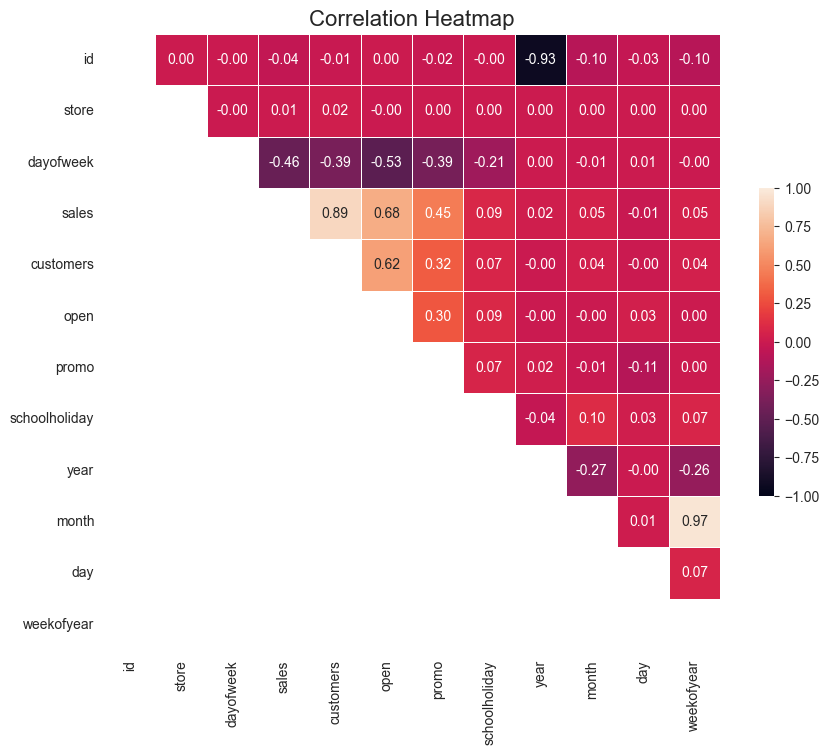

In [29]:
numeric_features = store_train.select_dtypes(include=[np.number])
correlation_map = numeric_features.corr()
mask = np.tril(np.ones_like(correlation_map, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_map, mask=mask, vmax=1.0, vmin=-1.0,
            square=True, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**As we can see that in the graph given below that Stores mainly closed on Sunday**

2025-04-28 10:00:08,096 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:00:08,928 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='dayofweek', ylabel='count'>

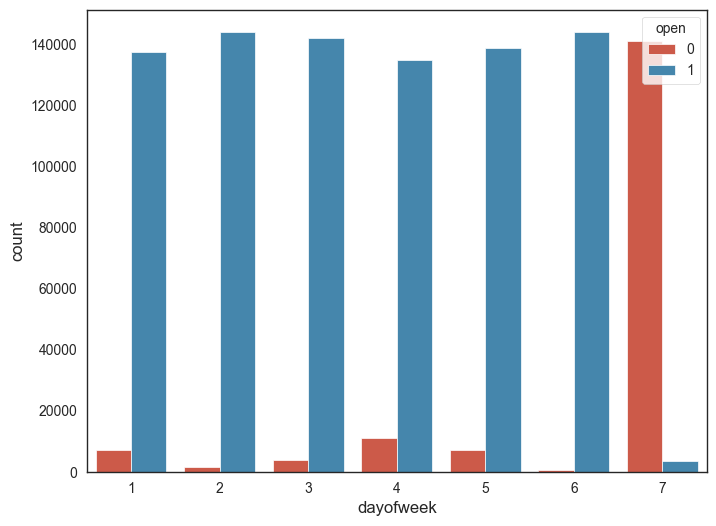

In [30]:
sns.countplot(x='dayofweek',hue='open',data=store_train)

**Sales Are nearly doubled High When Promo is Running**

2025-04-28 10:00:12,484 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:00:12,491 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


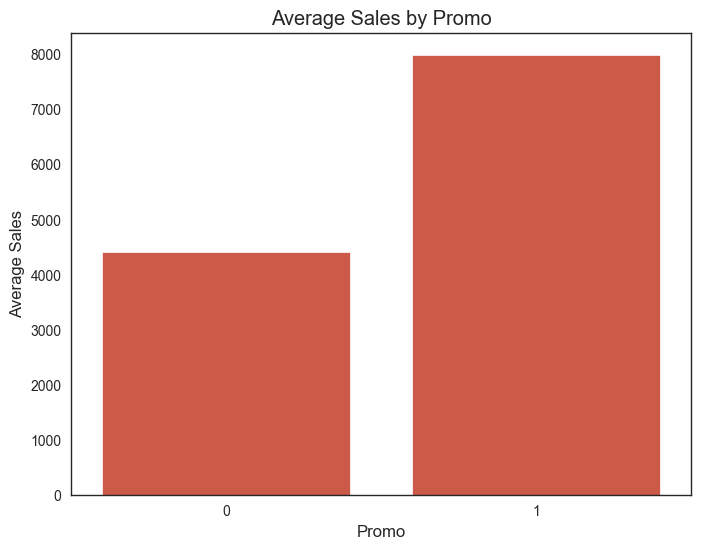

In [31]:
#Impact of promo on sales
store_train['sales'] = pd.to_numeric(store_train['sales'], errors='coerce')

Promo_sales = pd.DataFrame(store_train.groupby('promo').agg({'sales':'mean'}))

sns.barplot(x=Promo_sales.index, y=Promo_sales['sales'])
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.title('Average Sales by Promo')
plt.show()

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

2025-04-28 10:00:16,103 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:00:16,838 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


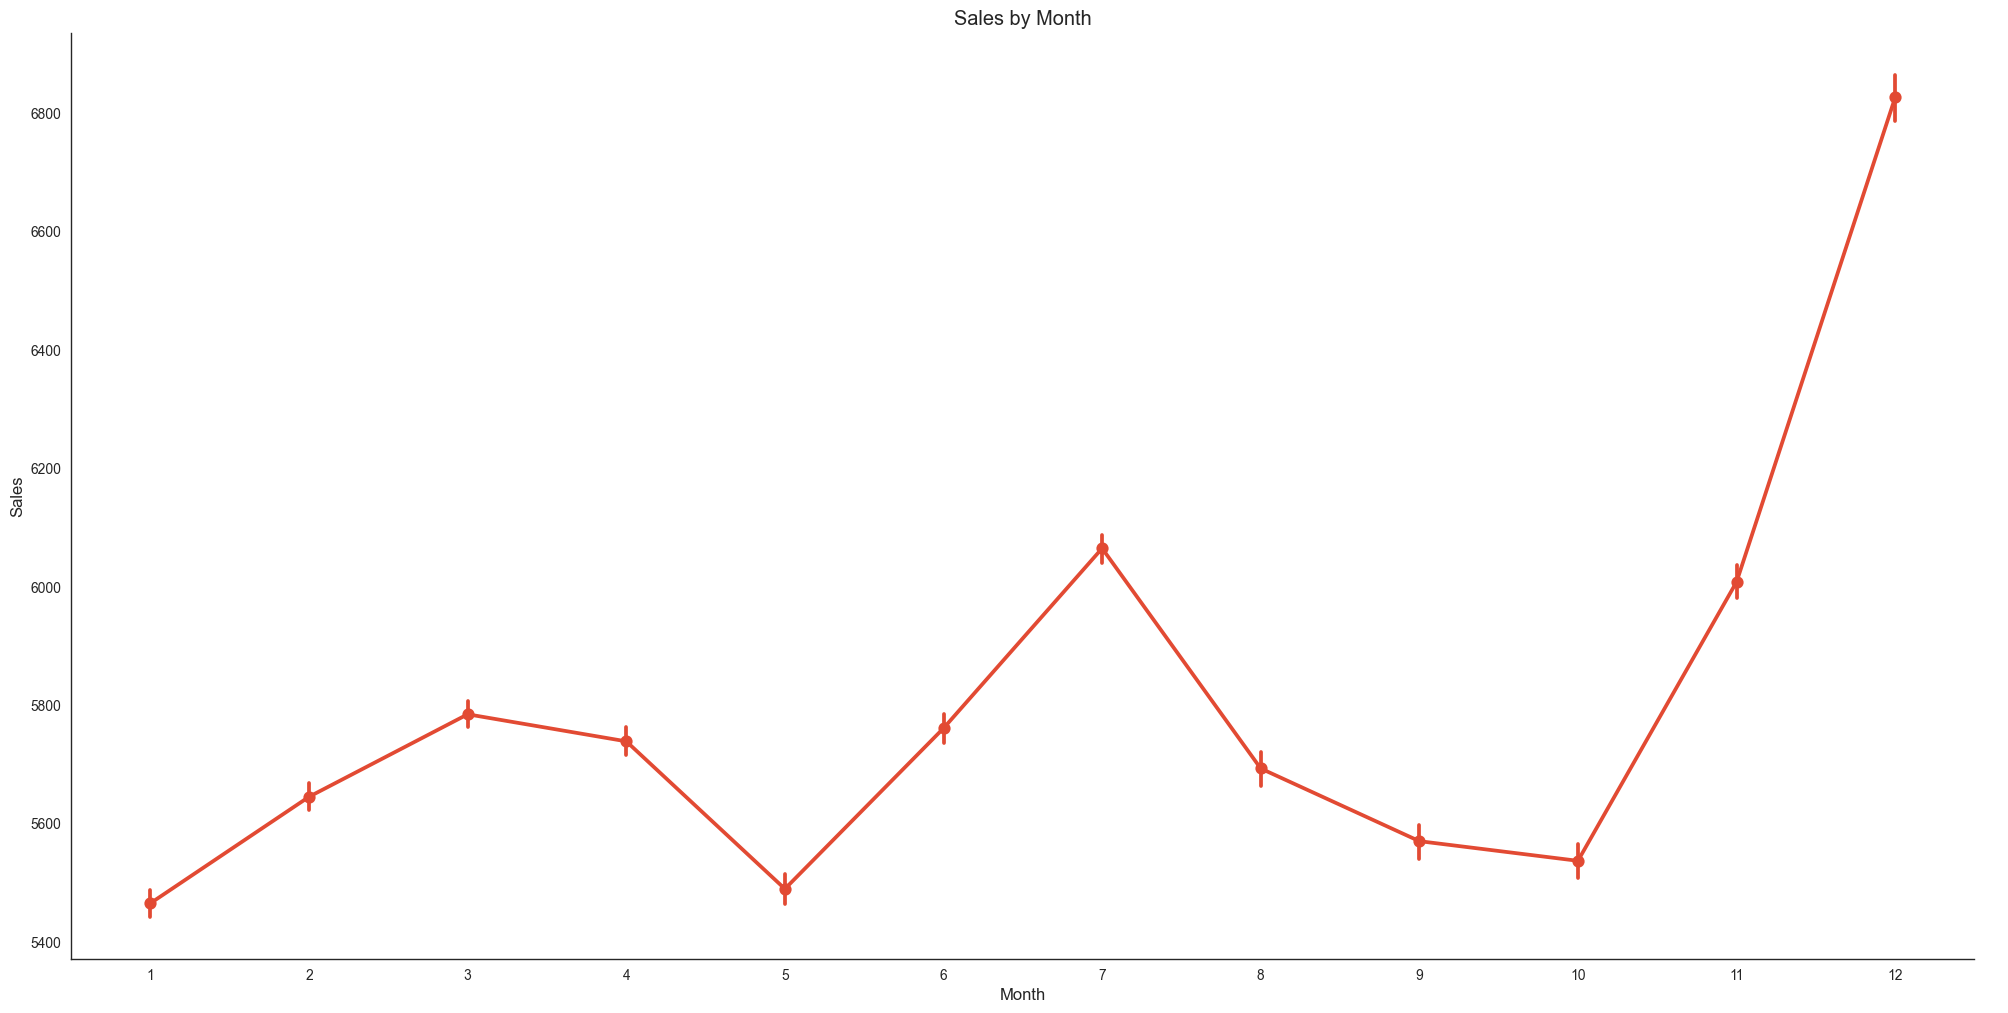

In [32]:
sns.catplot(x="month", y="sales", data=store_train, kind="point", aspect=2, height=10)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

In [33]:
# Value Counts of SchoolHoliday Column
store_train.schoolholiday.value_counts()

schoolholiday
0    835488
1    181721
Name: count, dtype: int64

**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

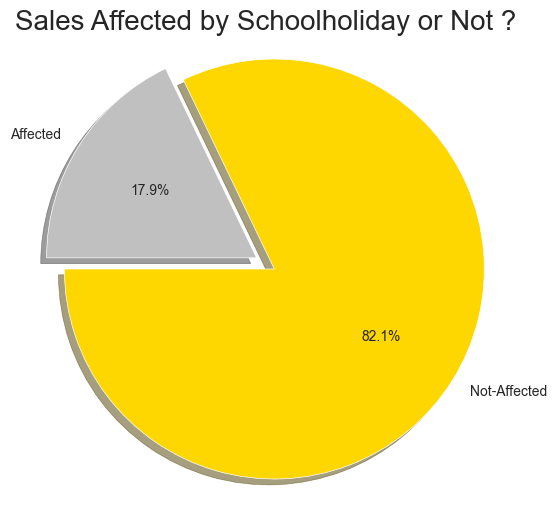

In [34]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.schoolholiday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Transforming Variable StateHoliday**

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

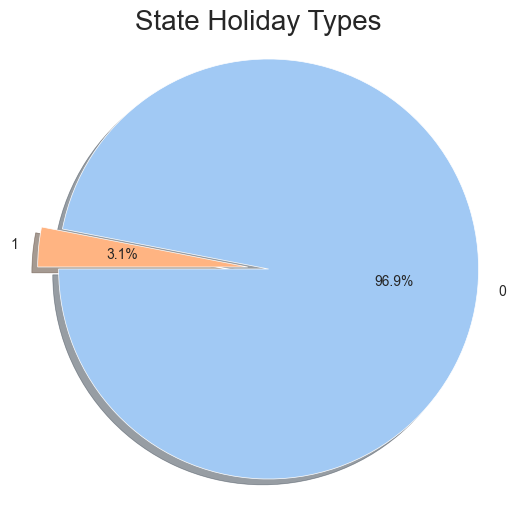

In [35]:
sizes = store_train['stateholiday'].value_counts()
labels = sizes.index
colors = sns.color_palette('pastel')[0:len(labels)]
explode = [0.1] + [0 for _ in range(len(labels)-1)]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=180)
ax.axis('equal')
plt.title("State Holiday Types", fontsize=20)
fig.set_size_inches(6,6)
plt.show()

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [36]:
store_train.drop('stateholiday',inplace=True,axis=1)

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/1536171744.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_train['sales'], kde = False,bins=40);


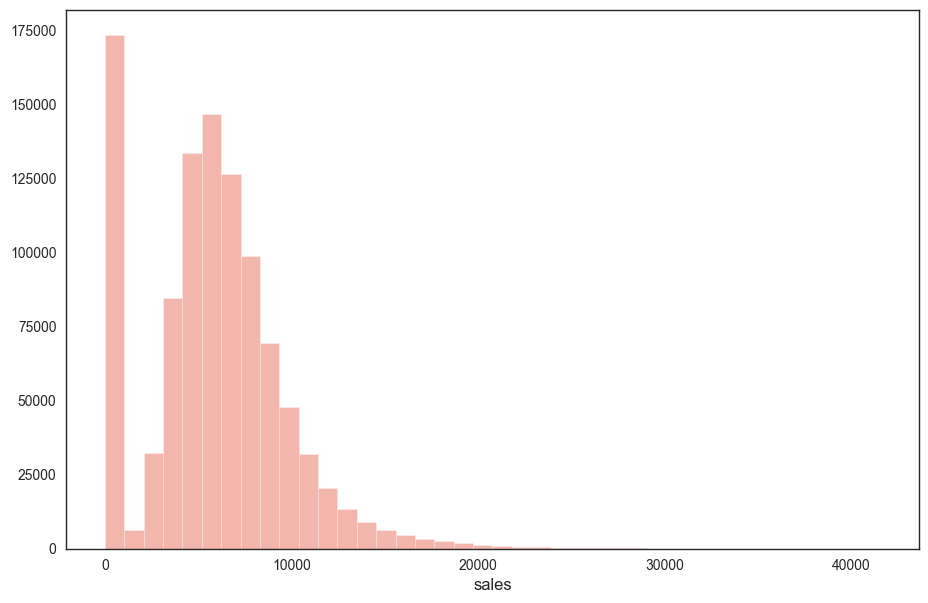

In [37]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(store_train['sales'], kde = False,bins=40);

**Sales vs Customers**

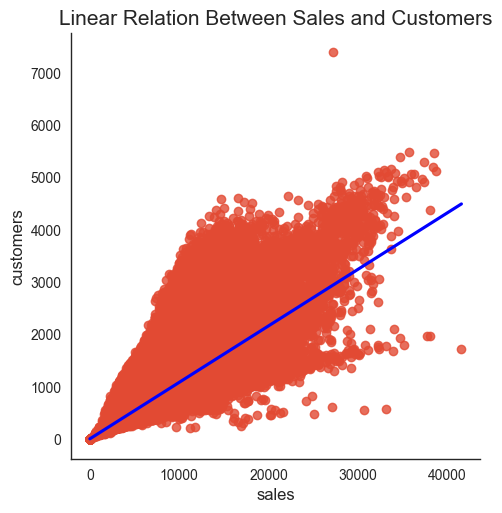

In [38]:
store_train['sales'] = pd.to_numeric(store_train['sales'], errors='coerce')
store_train['customers'] = pd.to_numeric(store_train['customers'], errors='coerce')

sns.lmplot(x='sales', y='customers', data=store_train, palette='seismic', height=5, aspect=1, line_kws={'color':'blue'})

plt.title('Linear Relation Between Sales and Customers', fontsize=15)
plt.show()

## **Analysing the Store Dataset**

In [39]:
store.head(5)

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,c,a,1270,9,2008,false,None,None,None
1,2,a,a,570,11,2007,true,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,true,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,false,None,None,None
4,5,a,a,29910,4,2015,false,None,None,None


In [40]:
store.tail()

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
1110,1111,a,a,1900,6,2014,true,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880,4,2006,false,None,None,None
1112,1113,a,c,9260,None,None,false,None,None,None
1113,1114,a,c,870,None,None,false,None,None,None
1114,1115,d,c,5350,None,None,true,22,2012,"Mar,Jun,Sept,Dec"


##### **Checking Information about Dataset**

In [41]:
store.shape

(1115, 10)

In [42]:
#Checking info of data as data types and rows and cols
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   store                      1115 non-null   object
 1   storetype                  1115 non-null   object
 2   assortment                 1115 non-null   object
 3   competitiondistance        1112 non-null   object
 4   competitionopensincemonth  761 non-null    object
 5   competitionopensinceyear   761 non-null    object
 6   promo2                     1115 non-null   object
 7   promo2sinceweek            571 non-null    object
 8   promo2sinceyear            571 non-null    object
 9   promointerval              571 non-null    object
dtypes: object(10)
memory usage: 87.2+ KB


In [43]:
#Checking Null Values
store.isnull().sum()

store                          0
storetype                      0
assortment                     0
competitiondistance            3
competitionopensincemonth    354
competitionopensinceyear     354
promo2                         0
promo2sinceweek              544
promo2sinceyear              544
promointerval                544
dtype: int64

**Heatmap for null values**

<Axes: >

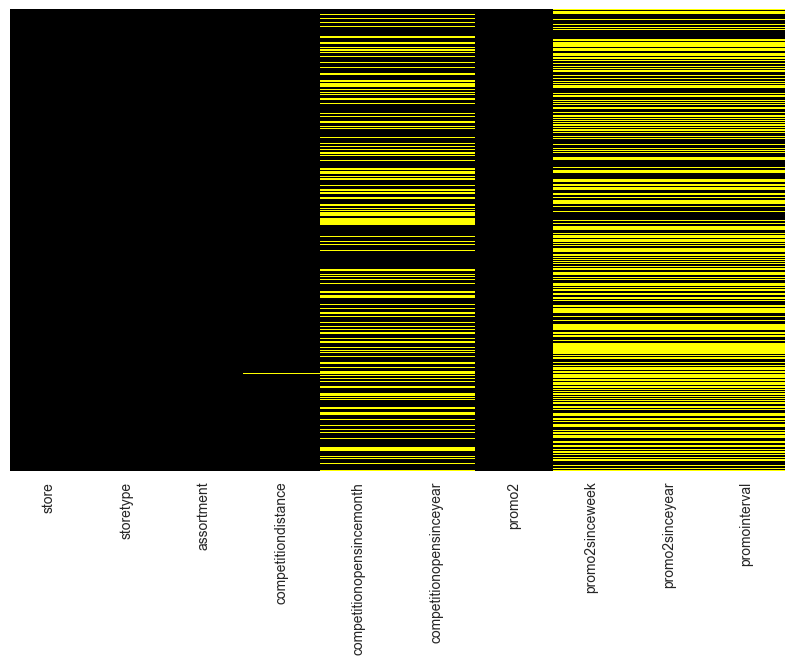

In [44]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

**Distribution Of Different Store Types**

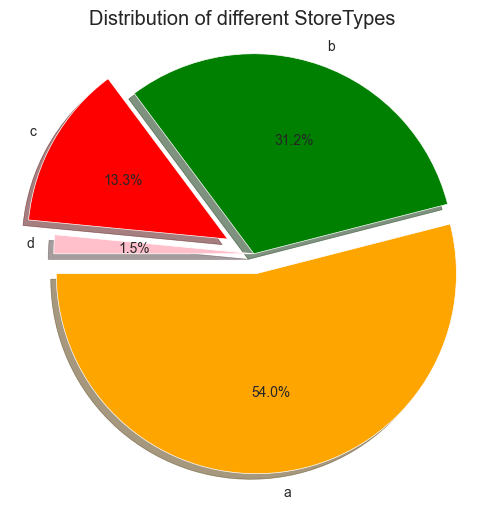

In [45]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store.storetype.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [46]:
# remove features
store = store.drop(['competitionopensincemonth', 'competitionopensinceyear','promo2sinceweek',
                     'promo2sinceyear', 'promointerval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/1933368162.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store.competitiondistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

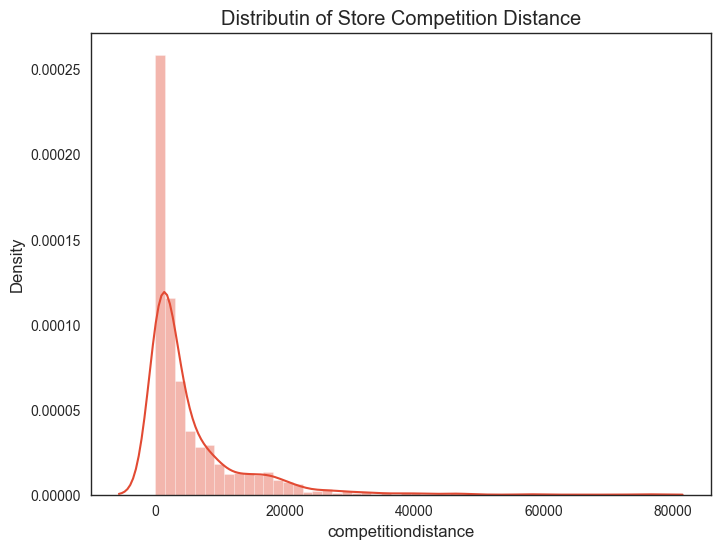

In [47]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store.competitiondistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [48]:
# replace missing values in CompetitionDistance with median for the store dataset
store['competitiondistance'] = pd.to_numeric(store['competitiondistance'], errors='coerce')
store.competitiondistance.fillna(store.competitiondistance.median(), inplace=True)

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/2473167054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store.competitiondistance.fillna(store.competitiondistance.median(), inplace=True)


**Pairplot for Store Dataset**

**Checking stores with their assortment type**

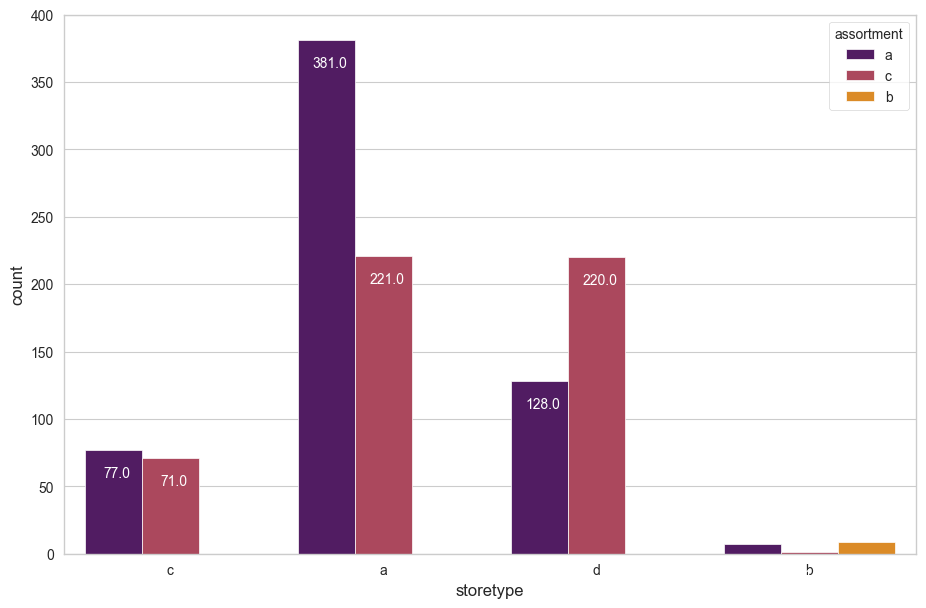

In [49]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='storetype',hue='assortment', data=store,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

***We can see that there is not such significant differences in these 3 years in terms of sales.*** 

2025-04-28 10:02:44,710 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:02:45,503 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


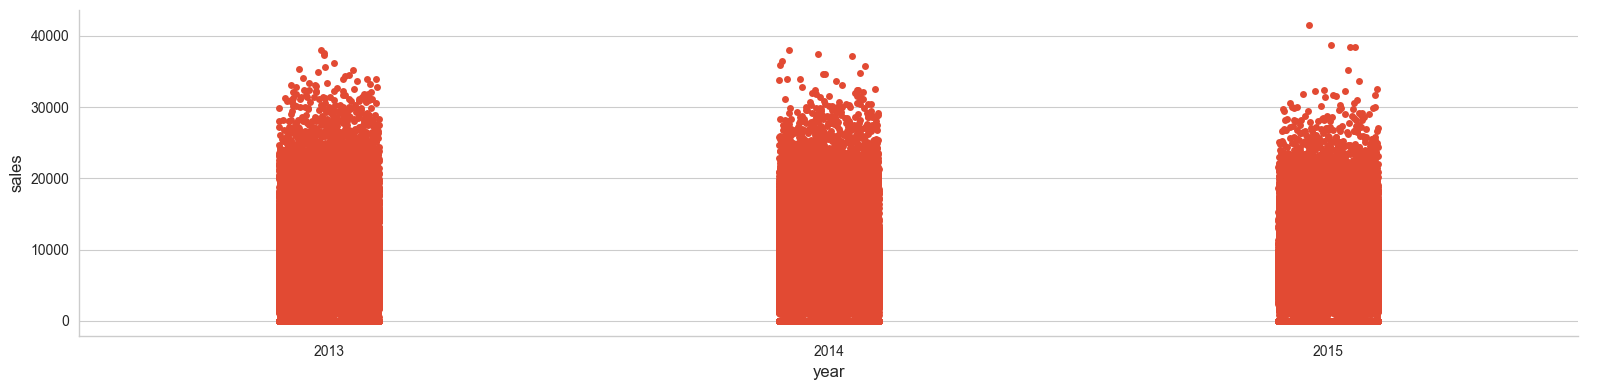

In [50]:
#plotting year vs sales
sns.catplot(x='year',y='sales',data=store_train, height=4, aspect=4 );

### **Merging Two Datasets**

In [51]:
store_train['store'] = store_train['store'].astype(int)
store['store'] = store['store'].astype(int)

train = pd.merge(store_train, store, on='store', how='left')
test = pd.merge(store_test, store, on='store', how='left')
train

,id,store,dayofweek,sales,customers,open,promo,schoolholiday,year,month,day,weekofyear,storetype,assortment,competitiondistance,promo2
0,0,1,5,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,false
1,1,2,5,6064,625,1,1,1,2015,7,31,31,a,a,570.0,true
2,2,3,5,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,true
3,3,4,5,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,false
4,4,5,5,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,0,0,0,0,1,2013,1,1,1,a,a,1900.0,true
1017205,1017205,1112,2,0,0,0,0,1,2013,1,1,1,c,c,1880.0,false
1017206,1017206,1113,2,0,0,0,0,1,2013,1,1,1,a,c,9260.0,false
1017207,1017207,1114,2,0,0,0,0,1,2013,1,1,1,a,c,870.0,false


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1017209 non-null  int64  
 1   store                1017209 non-null  int64  
 2   dayofweek            1017209 non-null  int64  
 3   sales                1017209 non-null  int64  
 4   customers            1017209 non-null  int64  
 5   open                 1017209 non-null  int64  
 6   promo                1017209 non-null  int64  
 7   schoolholiday        1017209 non-null  int64  
 8   year                 1017209 non-null  int64  
 9   month                1017209 non-null  int64  
 10  day                  1017209 non-null  int64  
 11  weekofyear           1017209 non-null  int64  
 12  storetype            1017209 non-null  object 
 13  assortment           1017209 non-null  object 
 14  competitiondistance  1017209 non-null  float64
 15

## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

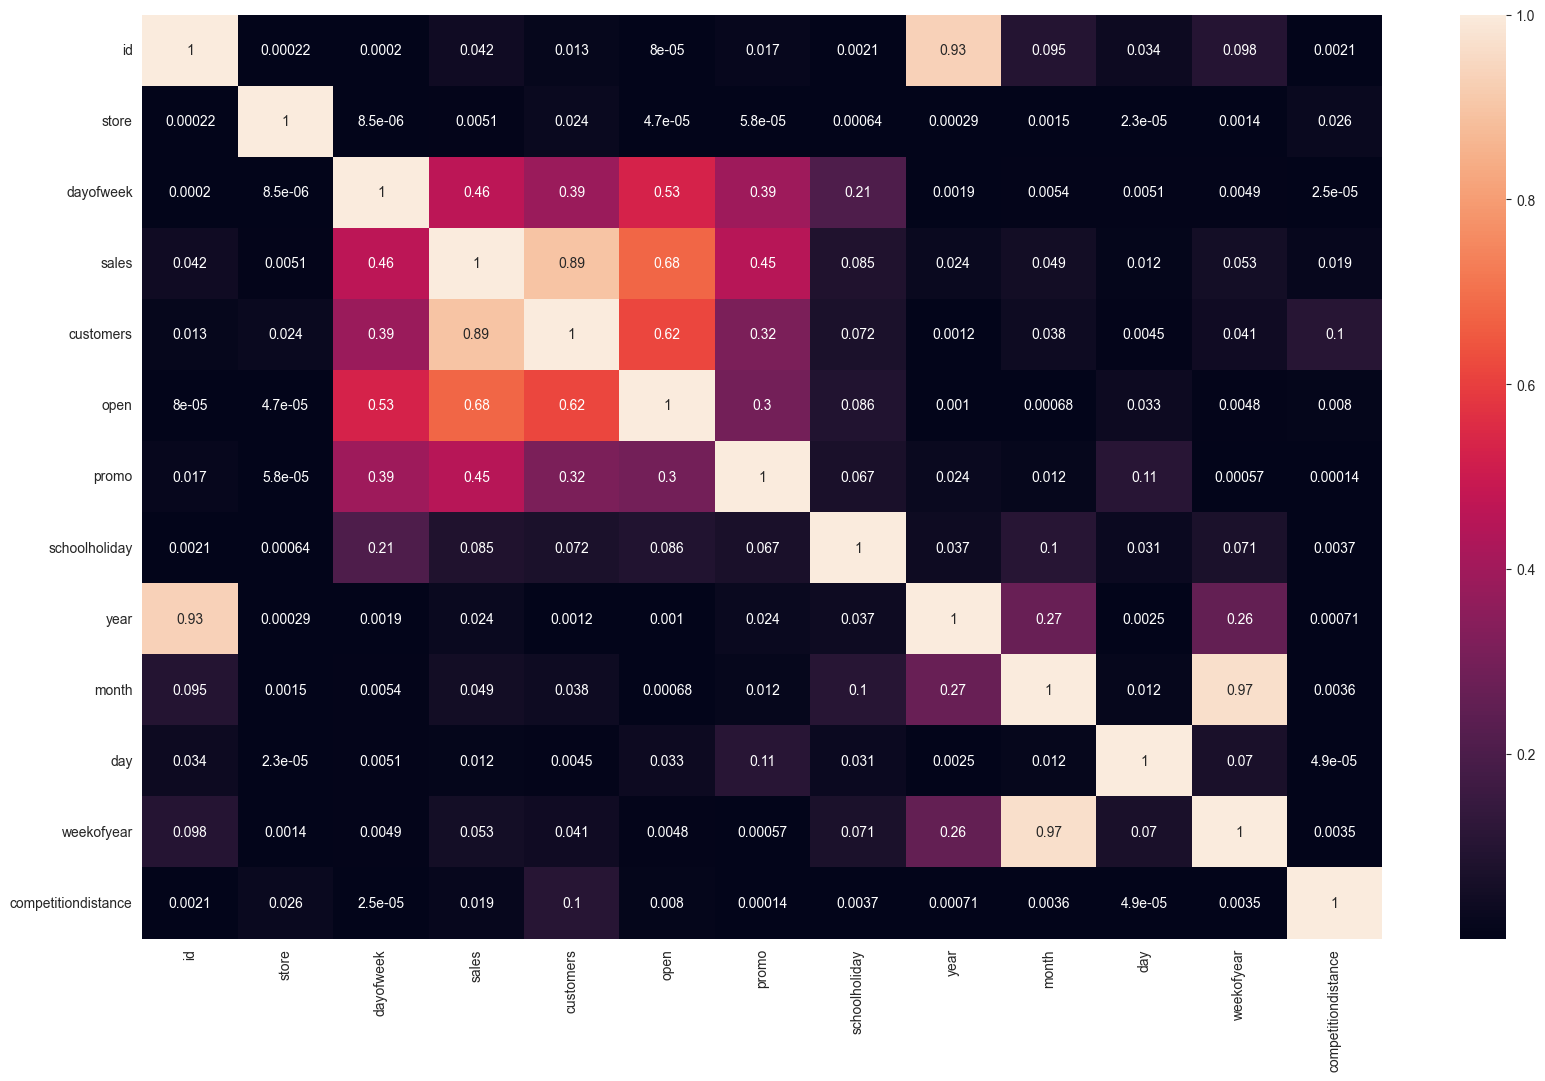

In [53]:
numeric_columns = train.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr().abs()

plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [54]:
train["avg_customer_sales"] = train.sales/train.customers

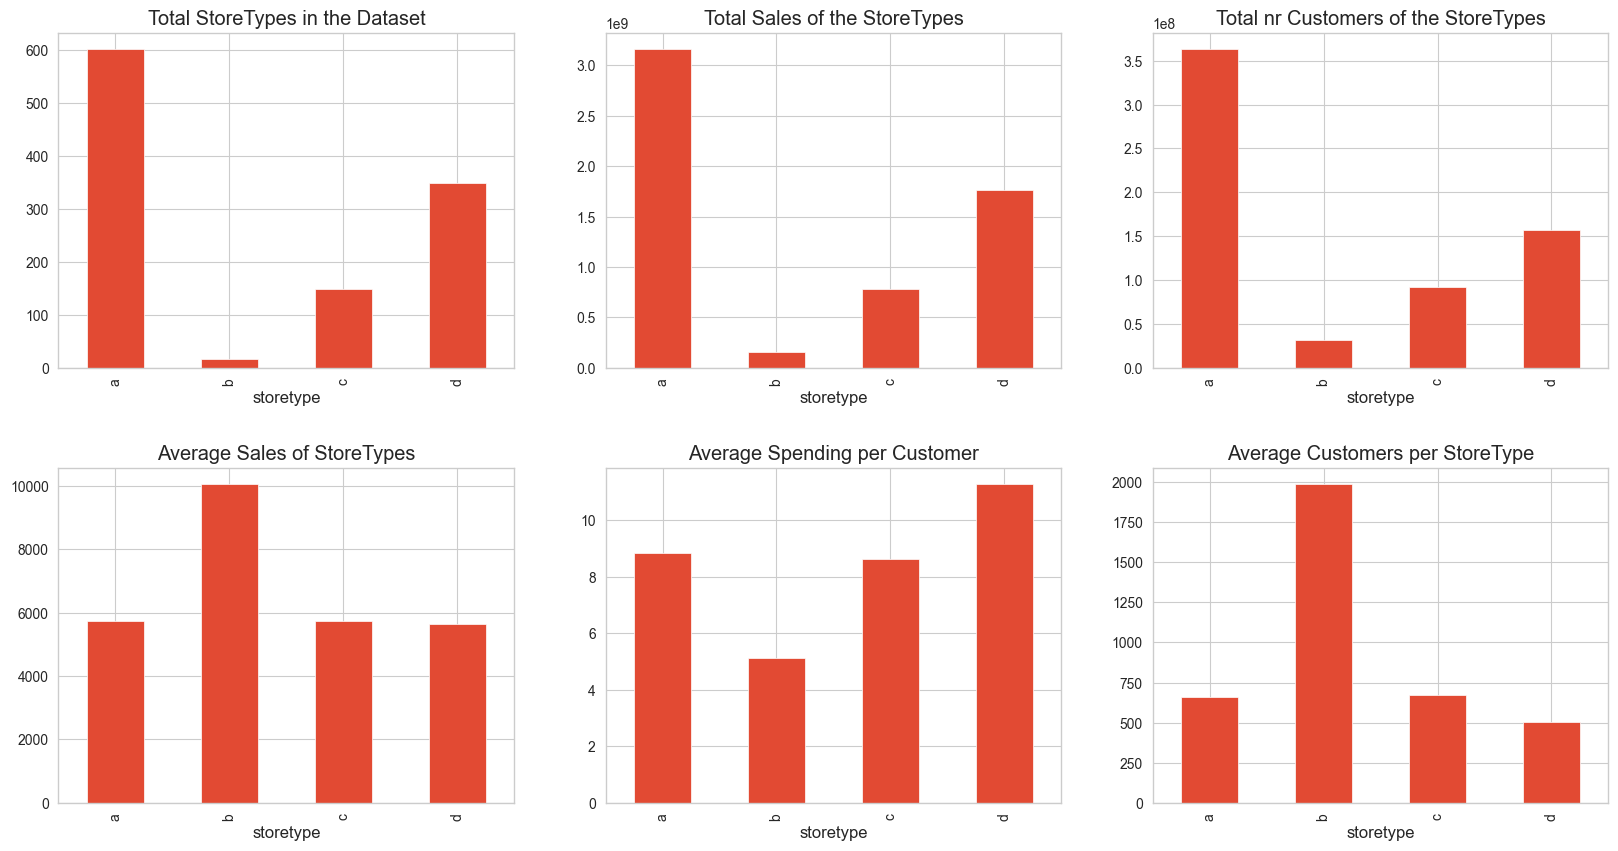

In [55]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("storetype")["store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train.groupby("storetype")["sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train.groupby("storetype")["customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train.groupby("storetype")["sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train.groupby("storetype")["avg_customer_sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train.groupby("storetype")["customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Lets go ahead with the promotions**

2025-04-28 10:03:11,187 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:03:12,011 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


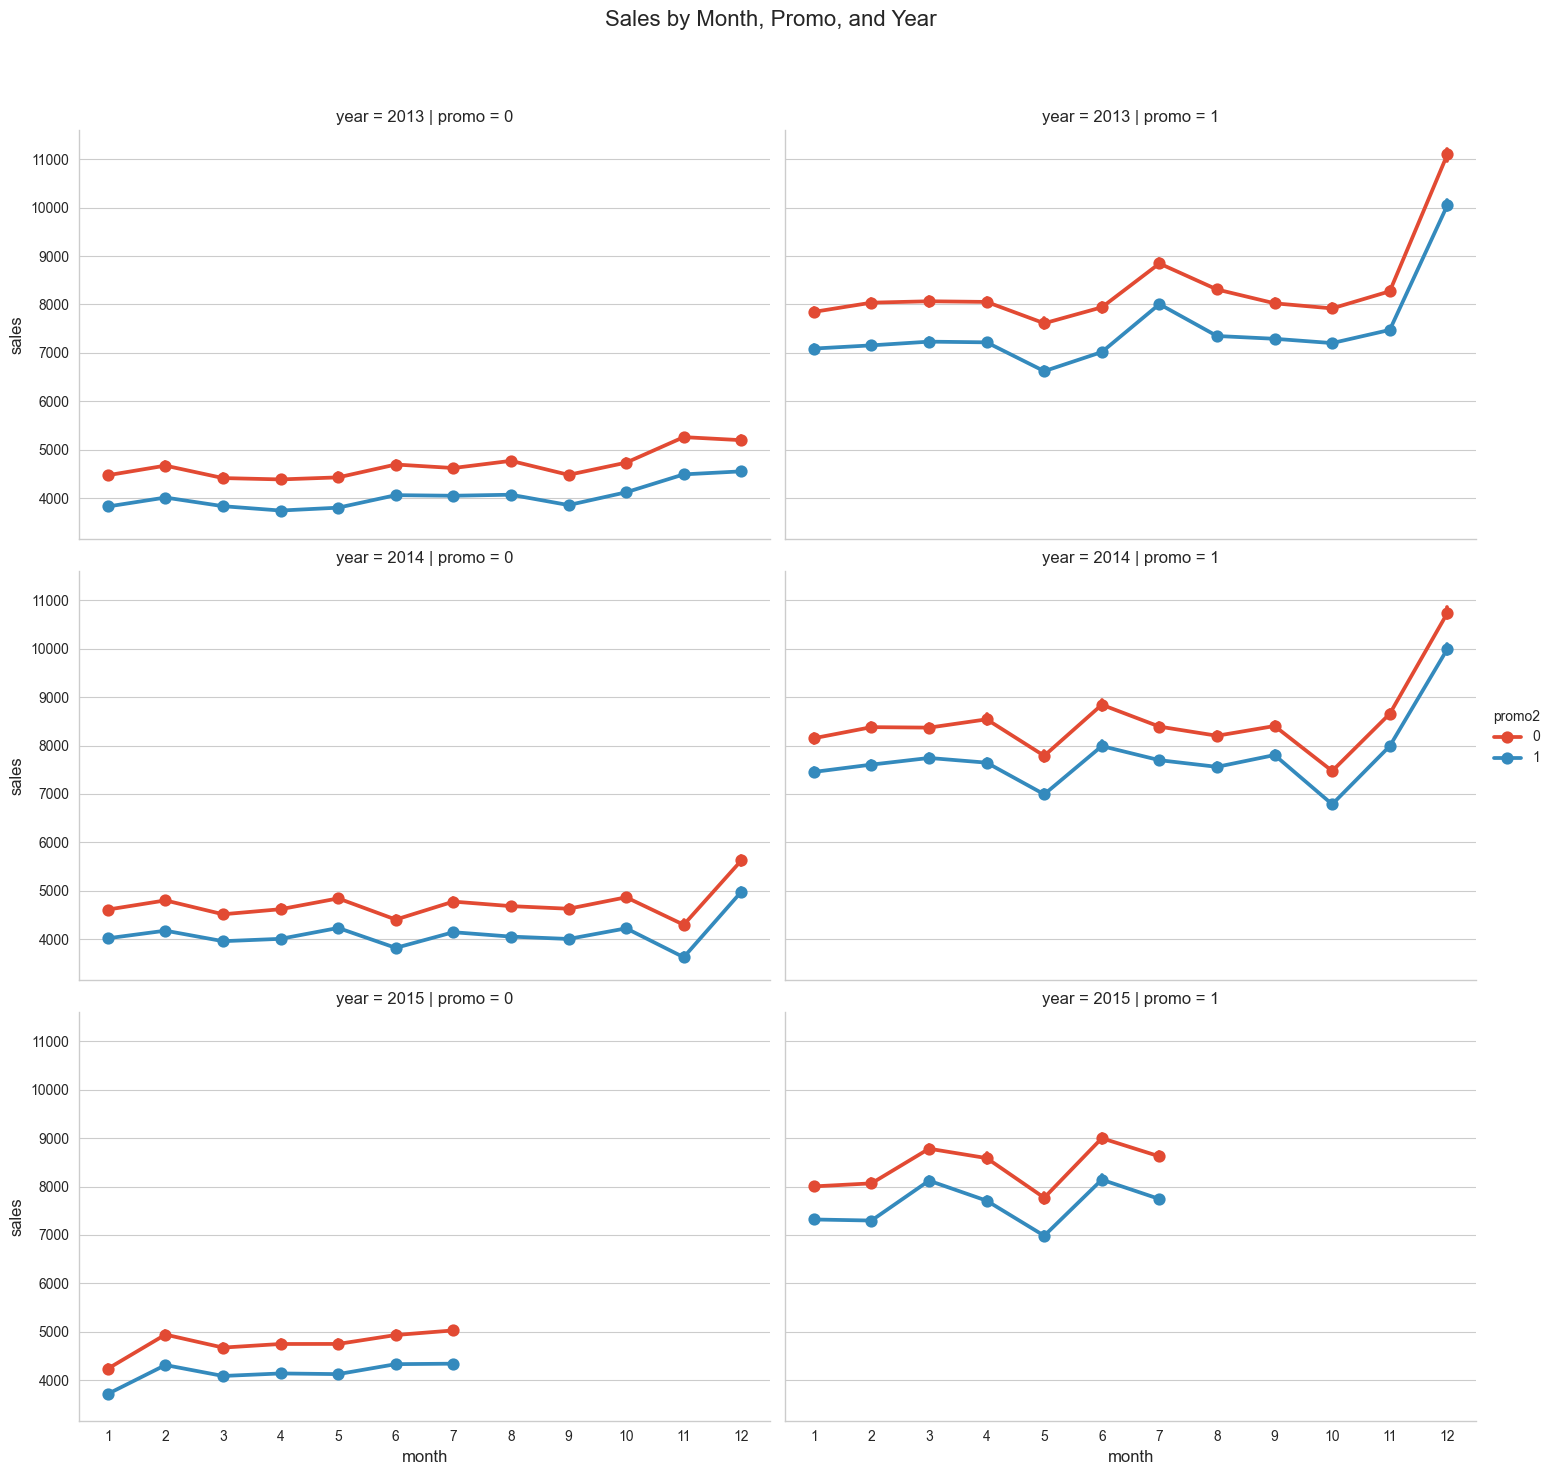

In [56]:
train['promo2'] = train['promo2'].map({'true': 1, 'false': 0}).fillna(0).astype(int)
test['promo2'] = test['promo2'].map({'true': 1, 'false': 0}).fillna(0).astype(int)

sns.catplot(data=train, x="month", y="sales", 
            col='promo', # per store type in cols
            hue='promo2', 
            row="year", 
            kind="point", 
            height=5, aspect=1.5)

plt.subplots_adjust(top=0.9)
plt.suptitle("Sales by Month, Promo, and Year", fontsize=16)

plt.show()
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

**As We can see that when the promo is running Sales are high**

2025-04-28 10:03:53,327 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:03:54,139 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


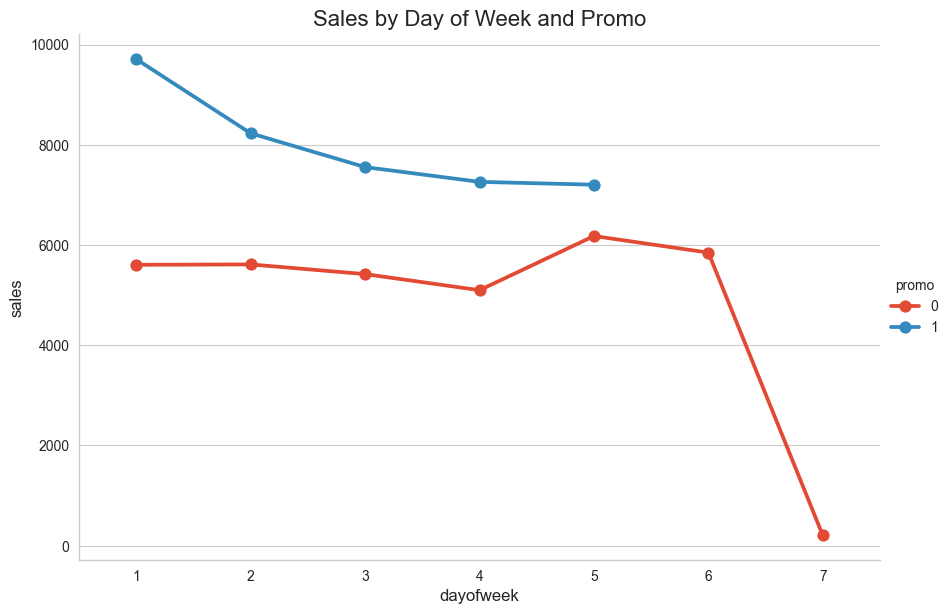

In [57]:
sns.catplot(data=train, x="dayofweek", y="sales", hue="promo", kind="point", height=6, aspect=1.5)

plt.title("Sales by Day of Week and Promo", fontsize=16)
plt.show()

In [58]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", train[(train.open == 1) & (train.dayofweek == 7)].store.unique().shape[0], "stores opend on sundays")    

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis.**

2025-04-28 10:04:15,020 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-28 10:04:16,113 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


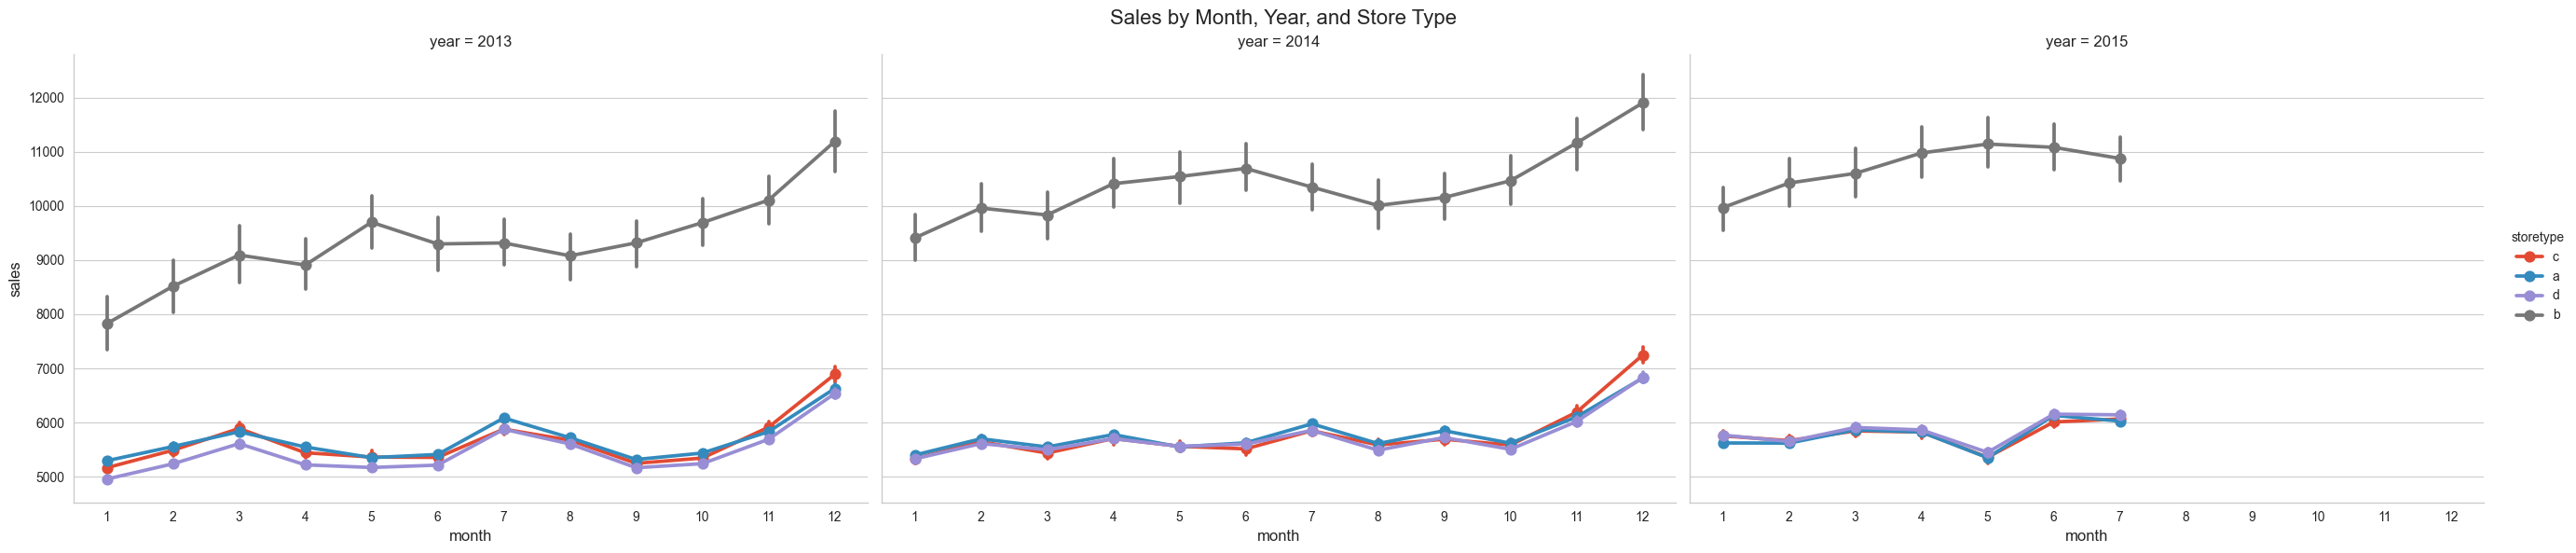

In [59]:
sns.catplot(data=train, x="month", y="sales", col="year", hue="storetype", kind="point", height=6, aspect=1.5)

plt.subplots_adjust(top=0.9)
plt.suptitle("Sales by Month, Year, and Store Type", fontsize=16)

plt.show()
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [60]:
train = train.dropna(subset=['competitiondistance'])
train['competitiondistance'] = pd.to_numeric(train['competitiondistance'], errors='coerce')
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
train["competitiondistance_cat"] = pd.cut(train["competitiondistance"], bins=5)

print(train['competitiondistance_cat'].head())

0     (-55.84, 15188.0]
1     (-55.84, 15188.0]
2     (-55.84, 15188.0]
3     (-55.84, 15188.0]
4    (15188.0, 30356.0]
Name: competitiondistance_cat, dtype: category
Categories (5, interval[float64, right]): [(-55.84, 15188.0] < (15188.0, 30356.0] < (30356.0, 45524.0] < (45524.0, 60692.0] < (60692.0, 75860.0]]


/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/3843378168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(by = "competitiondistance_cat").sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/3843378168.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(by = "competitiondistance_cat").customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='competitiondistance_cat'>

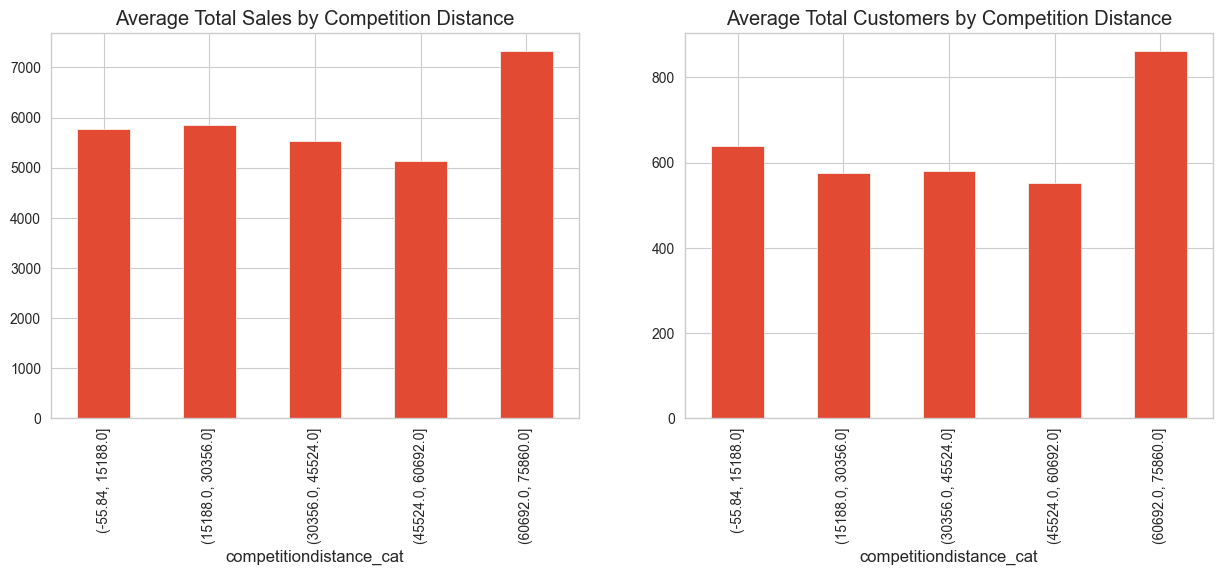

In [61]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train.groupby(by = "competitiondistance_cat").sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train.groupby(by = "competitiondistance_cat").customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [62]:
train.drop(['avg_customer_sales','competitiondistance_cat'],axis=1,inplace=True)

**Box plot shows that we have a very high outliers in sales**

<Axes: ylabel='sales'>

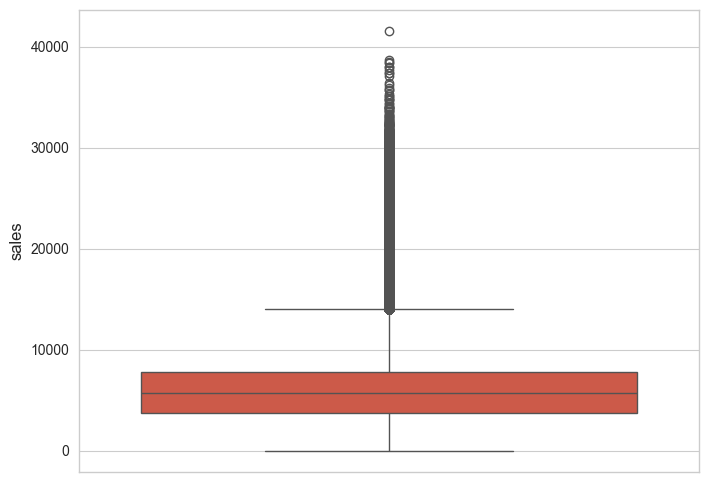

In [63]:
#checking outliers in sales
sns.boxplot(train['sales'])

**Removing Outliers Of Sales Column**

In [64]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [65]:
# defining new variable after removing outliers
train= remove_outlier(train, 'sales')

# **Conclusion of the analysis:**
 
**Sales are highly correlated to number of Customers.**
 
**The most selling and crowded store type is A.**
 
**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**
 
**StoreTybe D had the highest buyer cart.**
 
**Promo runs only in weekdays.**
 
**For all stores, Promotion leads to increase in Sales and Customers both.**
 
**More stores are opened during School holidays than State holidays.**
 
**The stores which are opened during School Holiday have more sales than normal days.**
 
**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**
 
**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**
 
**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [66]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
train = train[train.open != 0]

In [67]:
# Open isn't a variable anymore, so we'll drop it too
train = train.drop('open', axis=1)

In [68]:
# Check if there's any opened store with zero sales
train['store'] = pd.to_numeric(train['store'], errors='coerce')
train[train.sales == 0]['store'].sum()

np.int64(31460)

In [69]:
# see the percentage of open stored with zero sales
train[train.sales == 0]['sales'].sum()/train.sales.sum()

np.float64(0.0)

In [70]:
# remove this part of data to avoid bias
train = train[train.sales != 0]

In [91]:
train_new=train.copy()

In [92]:
train_new = pd.get_dummies(train_new,columns=['storetype','assortment'])

train_new['storetype_a'] = train_new['storetype_a'].replace({True: 1, False: 0})
train_new['storetype_b'] = train_new['storetype_b'].replace({True: 1, False: 0})
train_new['storetype_c'] = train_new['storetype_c'].replace({True: 1, False: 0})
train_new['storetype_d'] = train_new['storetype_d'].replace({True: 1, False: 0})

train_new['assortment_a'] = train_new['assortment_a'].replace({True: 1, False: 0})
train_new['assortment_b'] = train_new['assortment_b'].replace({True: 1, False: 0})
train_new['assortment_c'] = train_new['assortment_c'].replace({True: 1, False: 0})

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/3227963305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_new['storetype_a'] = train_new['storetype_a'].replace({True: 1, False: 0})
/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/3227963305.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_new['storetype_b'] = train_new['storetype_b'].replace({True: 1, False: 0})
/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/3227963305.py:5: FutureWarning: Downcasting behavior 

In [93]:
train_new.head()

,id,store,dayofweek,sales,customers,promo,schoolholiday,year,month,day,weekofyear,competitiondistance,promo2,storetype_a,storetype_b,storetype_c,storetype_d,assortment_a,assortment_b,assortment_c
0,0,1,5,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,1,2,5,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,2,3,5,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,3,4,5,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,4,5,5,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


**From plot it can be sen that most of the sales have been on 1st and last day of week**

2025-04-28 10:10:40,413 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/221677450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='sales', data=train_new, palette=colors)


2025-04-28 10:10:41,179 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


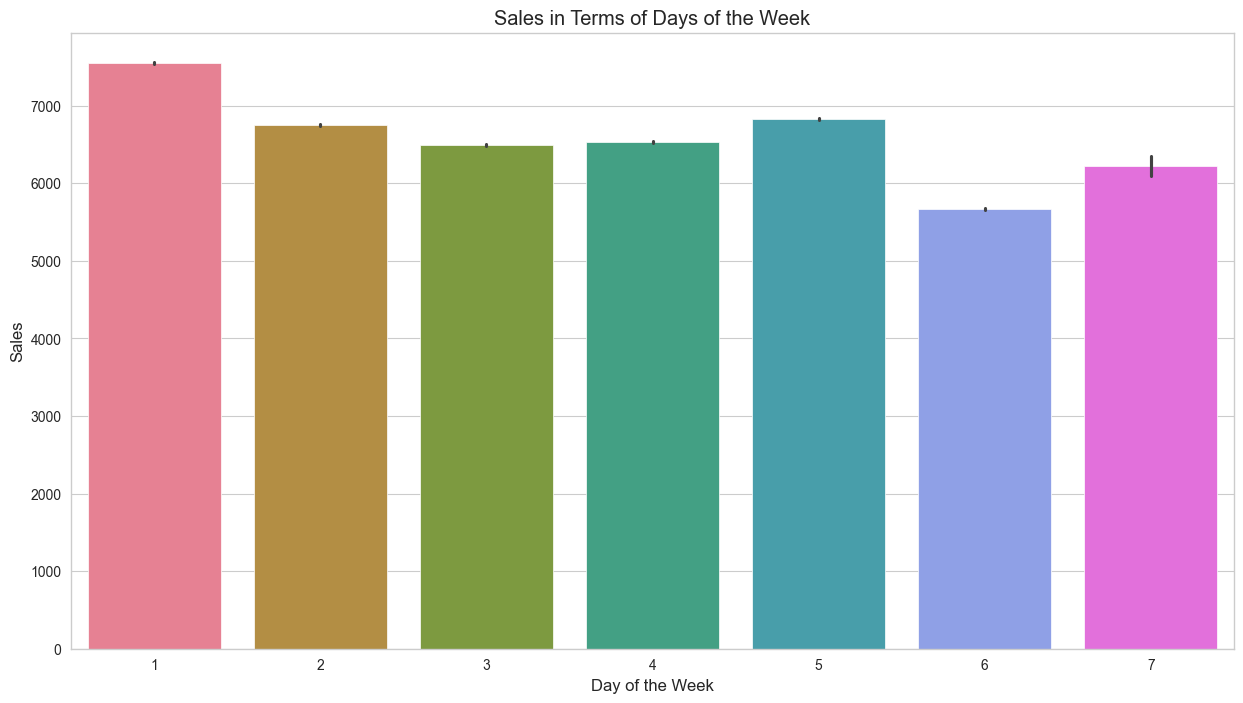

In [94]:
train_new['dayofweek'] = pd.to_numeric(train_new['dayofweek'], errors='coerce')

colors = sns.color_palette("husl", 7)  # 7 unique colors for 7 days

plt.figure(figsize=(15, 8))
sns.barplot(x='dayofweek', y='sales', data=train_new, palette=colors)

plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.title('Sales in Terms of Days of the Week')
plt.show()

#### **Setting Features and Target Variables**

In [95]:
X = train_new.drop(['sales', 'store', 'year'] , axis = 1)
y= train_new.sales

In [96]:
X.shape

(817644, 17)

In [97]:
X.head()

,id,dayofweek,customers,promo,schoolholiday,month,day,weekofyear,competitiondistance,promo2,storetype_a,storetype_b,storetype_c,storetype_d,assortment_a,assortment_b,assortment_c
0,0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [98]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: sales, dtype: int64

Splitting Dataset Into Training Set and Test Set

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [100]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

In [114]:
import joblib

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  colors = sns.color_palette("viridis", len(fi_df))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette=colors)
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')
  plt.show()

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

def model_train_evaluate(model, model_name, X_train, y_train, X_test, y_test, save_model=False, visualize=False):
    model.fit(X_train, y_train)
    
    if save_model:
        joblib.dump(model, f'{model_name}_model.pkl')
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, y_train_pred)
    test_rmse = rmse(y_test, y_test_pred)
    
    train_mape = mape(y_train, y_train_pred)
    test_mape = mape(y_test, y_test_pred)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    results = {
        'Model': model_name,
        'Train_Score': train_score,
        'Test_Score': test_score,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAPE': train_mape,
        'Test_MAPE': test_mape
    }

    if visualize:
        rf_prd = y_test_pred[:100]
        rf_real = y_test[:100]
        
        dataset_rf = pd.DataFrame({'Real': rf_real, 'Predicted': rf_prd})
        
        dataset_rf['diff'] = (dataset_rf['Real'] - dataset_rf['Predicted']).abs()

        print("Sample of 4 observations from the dataset:")
        print(dataset_rf.sample(4))
        print("Statistical description of the predictions and actual values:")
        print(dataset_rf.describe())

        dataset_rf.plot.hist(subplots=True, legend=False, figsize=(10, 6))
        plt.suptitle(f'Histograms of Actual and Predicted Sales for {model_name}')
        plt.show()
        
        sns.lmplot(x='Real', y='Predicted', data=dataset_rf, line_kws={'color': 'black'})
        plt.title(f'{model_name} - Real vs Predicted')
        plt.show()

    if visualize and model_name=="Random Forest Regression":
        plot_feature_importance(model.feature_importances_, columns[:], model_name)
    
    return results

## **1.  Linear Regression (OLS)**

In [102]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Sample of 4 observations from the dataset:
        Real    Predicted        diff
384625  8749  9345.056106  596.056106
631227  5293  4779.596754  513.403246
513766  5793  4939.425473  853.574527
591127  3376  3319.097584   56.902416
Statistical description of the predictions and actual values:
               Real     Predicted         diff
count    100.000000    100.000000   100.000000
mean    6775.070000   6778.161351   923.811435
std     2534.335345   2342.036112   734.235102
min     1072.000000   1527.067231    10.571062
25%     5004.750000   5149.826876   374.958548
50%     6548.000000   6760.217687   828.035068
75%     8598.250000   7980.485089  1308.631333
max    13001.000000  14235.858687  3861.033679


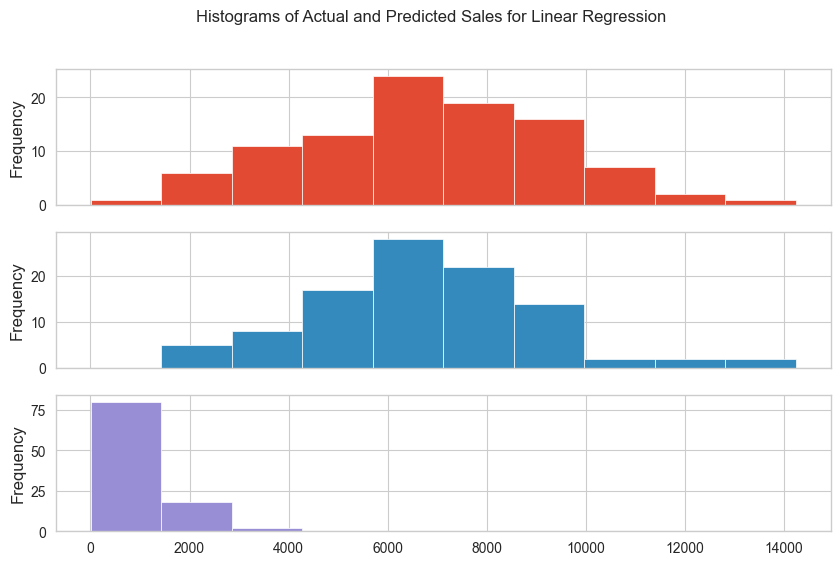

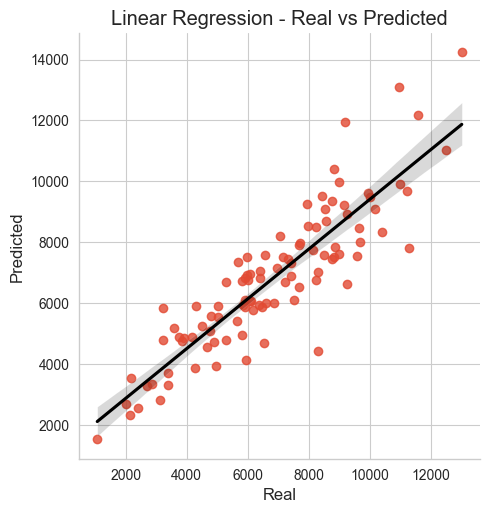

In [105]:
# Fitting Multiple Linear Regression to the Training set
results = []

lin_reg = LinearRegression()
results.append(model_train_evaluate(lin_reg, "Linear Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

## **Inferences On Linear Regression Coefficients**

In [87]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.976e+05
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:09:04   Log-Likelihood:            -6.9209e+06
No. Observations:              817644   AIC:                         1.384e+07
Df Residuals:                  817628   BIC:                         1.384e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -833.3709      5.867   -142.052      0.000    -844.869    -821.872
id                     -0.0004   4.34e-06    -98.138      0.000      -0.000      -0.000
dayofweek             -21.3047      0.781    -27.294      0.000     -22.835     -19.775
customers               7.2230      0.005   1479.958      0.000       7.213       7.233
promo                1088.0630      2.753    395.296      0.000    1082.668    1093.458
schoolholiday          29.3647      3.307      8.880      0.000      22.883      35.846
month                  31.1657      1.424     21.881      0.000      28.374      33.957
day                     0.6876      0.151      4.553      0.000       0.392       0.984
weekofyear             -3.7812      0.328    -11.529      0.000      -4.424      -3.138
competitiondistance     0.0240      0.000    141.247      0.000       0.024       0.024
promo2                310.4796      2.646    117.330      0.000     305.293     315.666
storetype_a           107.9113      4.771     22.619      0.000      98.561     117.262
storetype_b         -2105.0012     12.659   -166.286      0.000   -2129.812   -2080.190
storetype_c           -41.5152      5.298     -7.835      0.000     -51.900     -31.131
storetype_d          1205.2343      5.013    240.438      0.000    1195.410    1215.059
assortment_a         1164.9609      6.439    180.928      0.000    1152.341    1177.581
assortment_b        -3450.2511     15.307   -225.399      0.000   -3480.253   -3420.249
assortment_c         1451.9194      6.622    219.246      0.000    1438.940    1464.899
==============================================================================
Omnibus:                    49881.055   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152029.909
Skew:                           0.297   Prob(JB):                         0.00
Kurtosis:                       5.027   Cond. No.                     6.50e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.71e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **2. LARS Lasso Regression**

Sample of 4 observations from the dataset:
         Real     Predicted         diff
430308  10009   9475.100647   533.899353
553403   7685   7920.228289   235.228289
906696   7159   7527.339134   368.339134
360297  13001  14209.177165  1208.177165
Statistical description of the predictions and actual values:
               Real     Predicted         diff
count    100.000000    100.000000   100.000000
mean    6775.070000   6776.844833   924.102549
std     2534.335345   2336.927414   731.734395
min     1072.000000   1537.371381    10.125225
25%     5004.750000   5149.483863   378.671831
50%     6548.000000   6759.511505   822.487562
75%     8598.250000   7978.073258  1306.251548
max    13001.000000  14209.177165  3821.358716


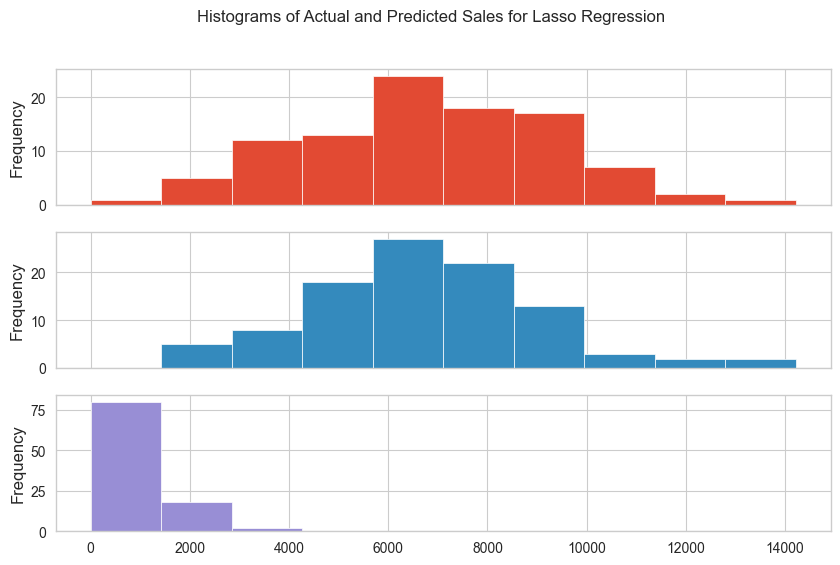

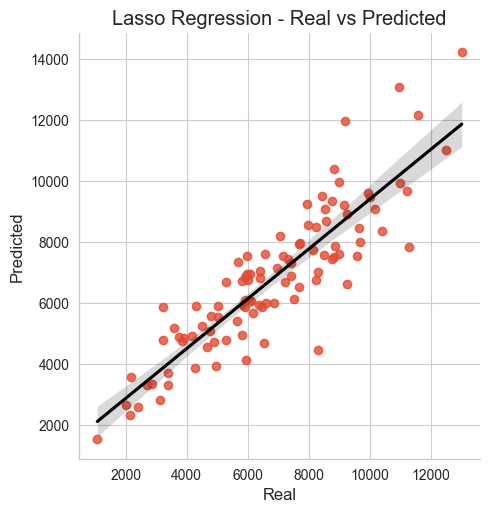

In [106]:
lasso = LassoLars(alpha=0.3, fit_intercept=False)
results.append(model_train_evaluate(lasso, "Lasso Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

## **3. Decision Tree Regression**

Sample of 4 observations from the dataset:
         Real  Predicted    diff
158975   4185     4281.0    96.0
362622  10403    10181.0   222.0
31014    4789     3845.0   944.0
27779    7213     5996.0  1217.0
Statistical description of the predictions and actual values:
               Real     Predicted        diff
count    100.000000    100.000000   100.00000
mean    6775.070000   6635.510000   477.56000
std     2534.335345   2405.050761   474.93022
min     1072.000000   1176.000000     5.00000
25%     5004.750000   5122.500000   142.25000
50%     6548.000000   6555.000000   282.00000
75%     8598.250000   8406.000000   602.50000
max    13001.000000  12228.000000  2883.00000


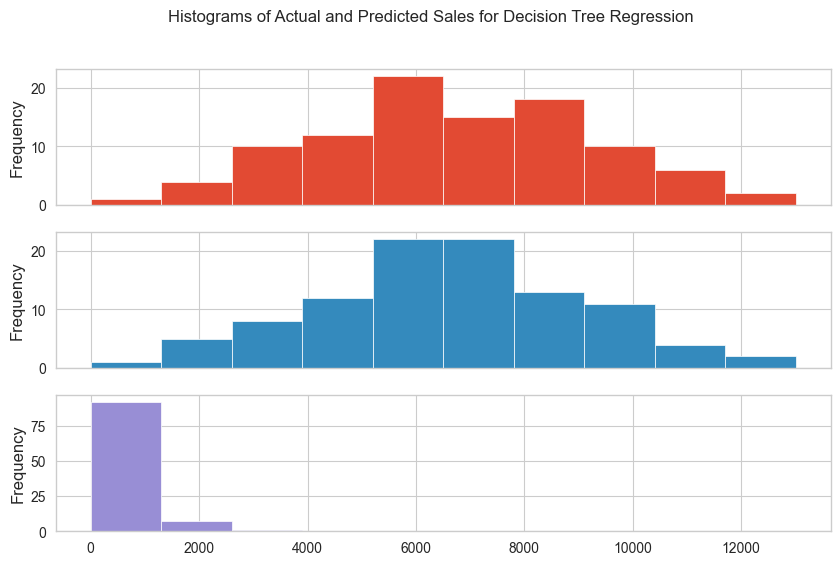

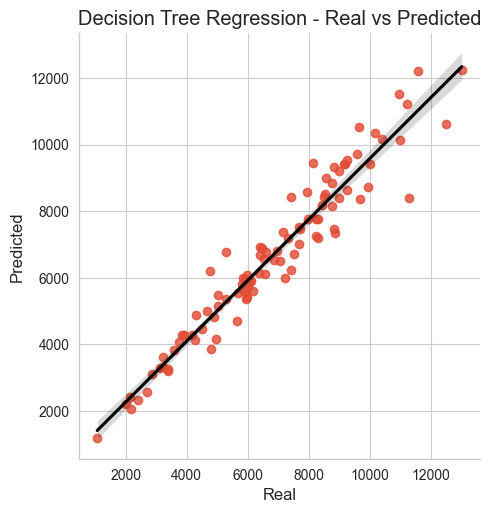

In [107]:
tree = DecisionTreeRegressor()
results.append(model_train_evaluate(tree, "Decision Tree Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

### **Decision Tree With Hyper Parameter Tuning**

In [134]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Decision Tree**

**{ min_samples_split=5,min_samples_leaf=8 }**

Sample of 4 observations from the dataset:
          Real     Predicted        diff
97497     9158   9119.461538   38.538462
544880   10150  10482.875000  332.875000
1013343   3132   3293.153846  161.153846
580379    6369   6810.000000  441.000000
Statistical description of the predictions and actual values:
               Real     Predicted         diff
count    100.000000    100.000000   100.000000
mean    6775.070000   6822.308835   428.686999
std     2534.335345   2495.903674   427.737712
min     1072.000000   1194.000000     6.875000
25%     5004.750000   5275.322917   124.783333
50%     6548.000000   6792.153846   295.442308
75%     8598.250000   8648.602679   564.884615
max    13001.000000  12954.571429  2122.636364


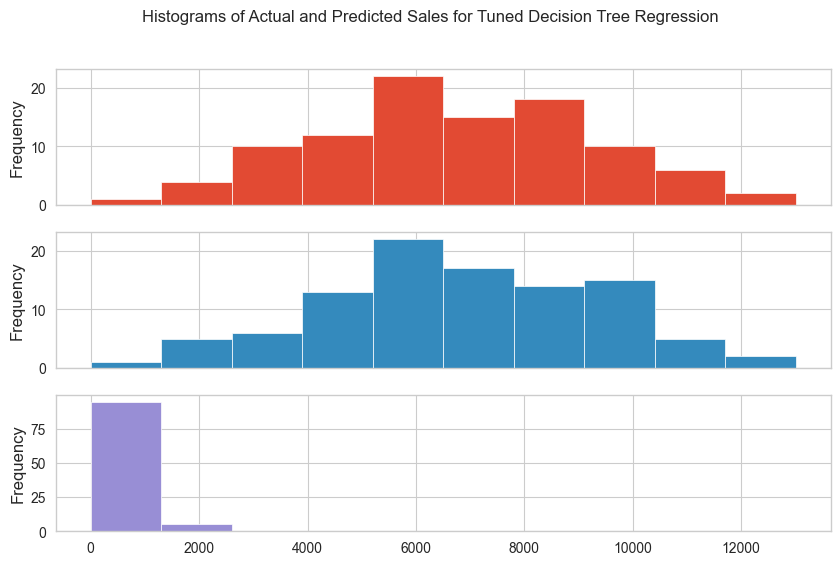

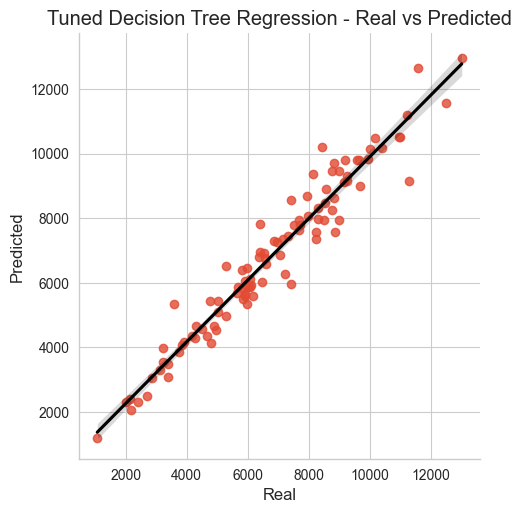

In [108]:
tree_tuned = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
results.append(model_train_evaluate(tree_tuned, "Tuned Decision Tree Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

# **4. Support Vector Regression**

In [ ]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#results.append(model_train_evaluate(svr, "Support Vector Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

## **5. K-Nearest Neighbors Regression**

Sample of 4 observations from the dataset:
        Real    Predicted         diff
580379  6369  4190.800000  2178.200000
27779   7213  6329.800000   883.200000
557319  9581  8049.000000  1532.000000
746746  9630  7318.533333  2311.466667
Statistical description of the predictions and actual values:
               Real     Predicted         diff
count    100.000000    100.000000   100.000000
mean    6775.070000   6627.179000  1177.540333
std     2534.335345   1786.970913   788.663992
min     1072.000000   2555.533333    75.233333
25%     5004.750000   5286.408333   584.700000
50%     6548.000000   6622.183333  1104.216667
75%     8598.250000   7830.908333  1515.850000
max    13001.000000  10637.933333  3972.533333


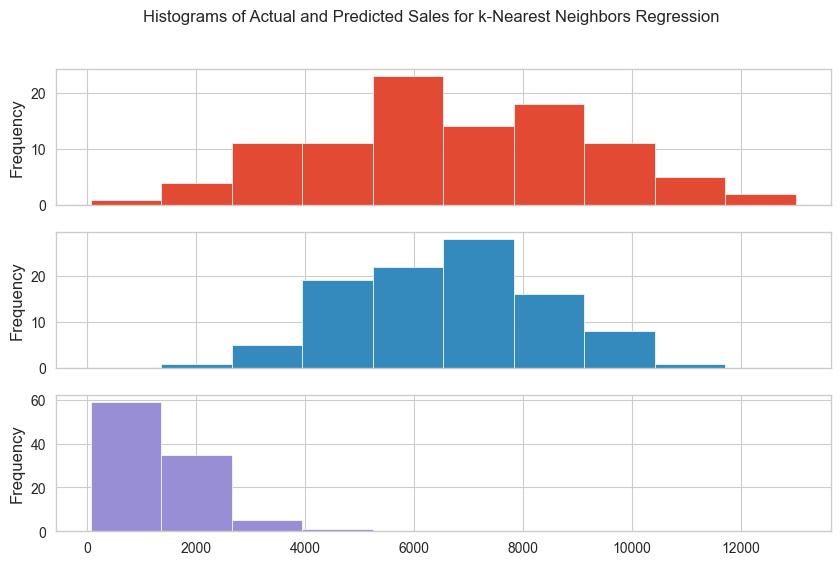

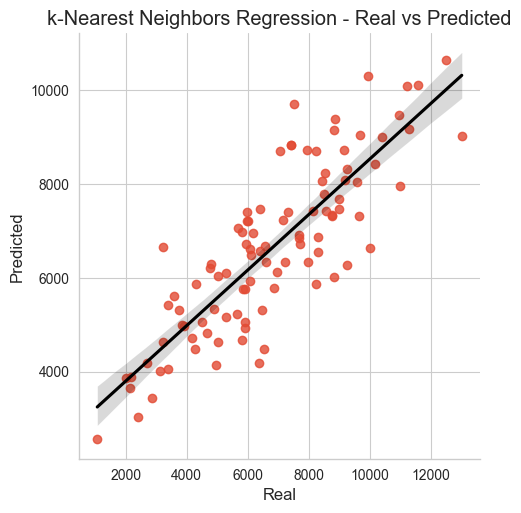

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)

results.append(model_train_evaluate(knn, "k-Nearest Neighbors Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

### **6. Random Forest With Hyper Parameter Tuning**

In [143]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Random Forest**

**{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }**

Sample of 4 observations from the dataset:
          Real   Predicted      diff
360297   13001  12808.2250  192.7750
513766    5793   5471.0000  322.0000
178721    2026   2195.9625  169.9625
1015614   4888   4768.1125  119.8875
Statistical description of the predictions and actual values:
               Real     Predicted         diff
count    100.000000    100.000000   100.000000
mean    6775.070000   6747.943250   388.222250
std     2534.335345   2484.149906   354.888827
min     1072.000000   1110.562500     7.700000
25%     5004.750000   5134.940625   131.493750
50%     6548.000000   6518.968750   289.362500
75%     8598.250000   8476.671875   562.512500
max    13001.000000  12808.225000  2043.125000


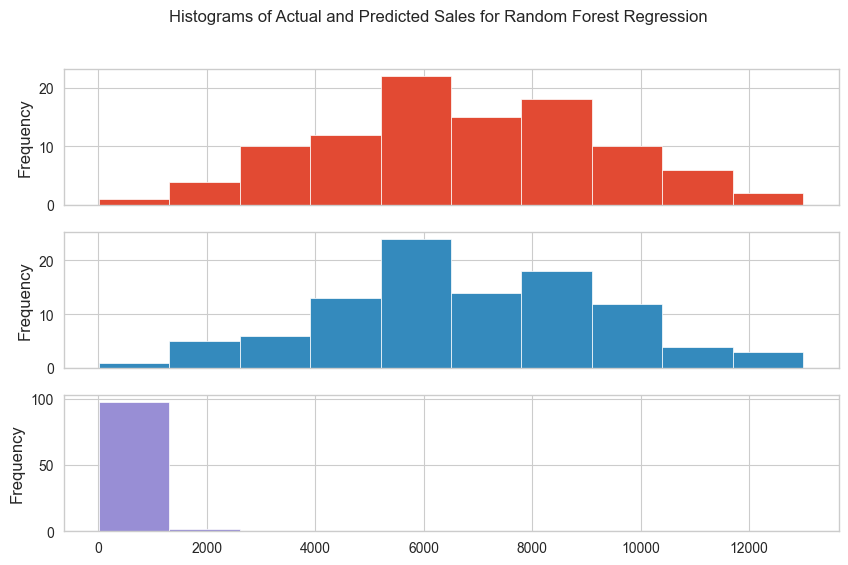

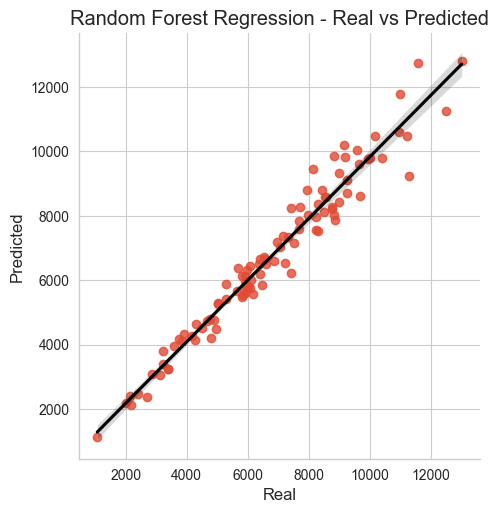

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/4195536892.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette=colors)


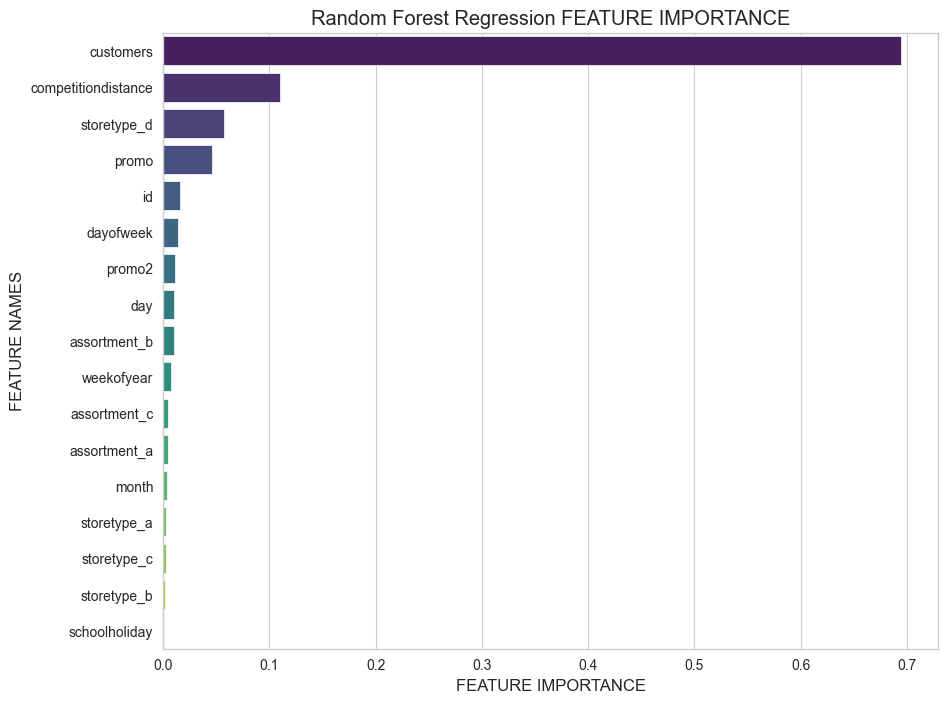

In [112]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
results.append(model_train_evaluate(rdf, "Random Forest Regression", X_train, y_train, X_test, y_test, save_model=True, visualize=True))

## **Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score

**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**

In [118]:
score_df = pd.DataFrame(results)
score_df

,Model,Train_Score,Test_Score,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,Linear Regression,0.783317,0.784890,1148.244212,1146.361297,14.118264,14.140345
1,Lasso Regression,0.783298,0.784866,1148.295014,1146.425353,14.122957,14.144870
2,Decision Tree Regression,1.000000,0.911921,0.000000,733.546886,0.000000,7.677361
3,Tuned Decision Tree Regression,0.963351,0.930715,472.228732,650.595860,4.996006,6.879156
4,k-Nearest Neighbors Regression,0.676349,0.650872,1403.331871,1460.439759,18.066527,18.854862
5,Random Forest Regression,0.993726,0.956172,195.389935,517.446935,2.106154,5.630561


In [121]:
# Melting the DataFrame for visualization purposes
score_df_melted_scores = score_df.melt(id_vars=['Model'], value_vars=['Train_Score', 'Test_Score'], 
                                var_name='Metric_Type', value_name='Value')
score_df_melted_rmse = score_df.melt(id_vars=['Model'], value_vars=['Train_RMSE', 'Test_RMSE'], 
                                var_name='Metric_Type', value_name='Value')
score_df_melted_mape = score_df.melt(id_vars=['Model'], value_vars=['Train_MAPE', 'Test_MAPE'], 
                                var_name='Metric_Type', value_name='Value')

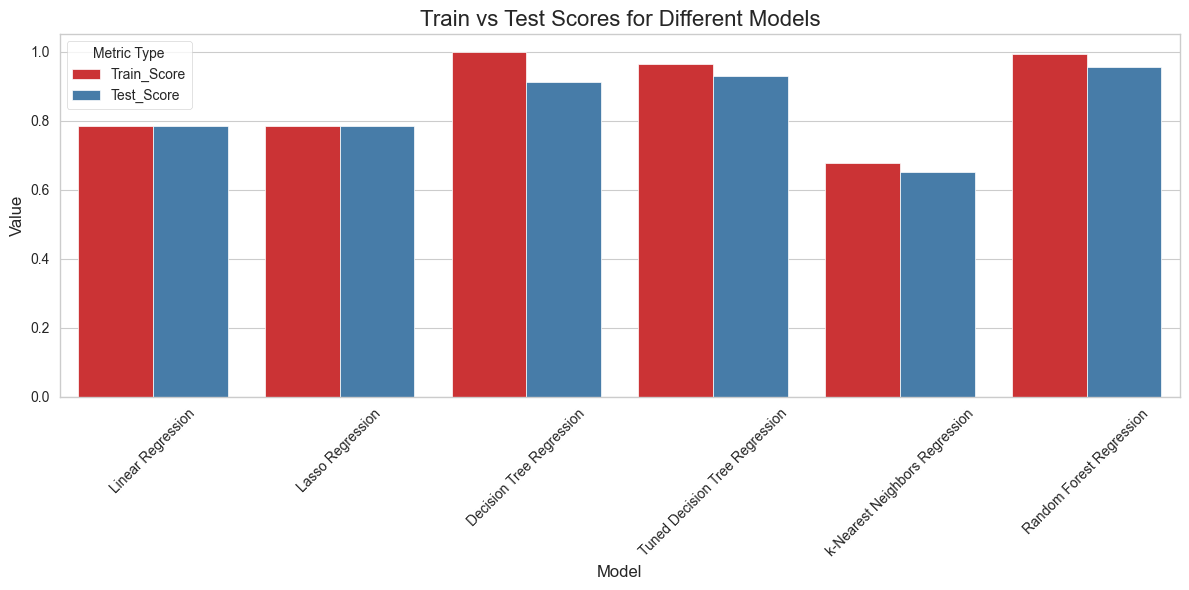

In [122]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")

sns.barplot(x='Model', y='Value', hue='Metric_Type', data=score_df_melted_scores)

plt.title('Train vs Test Scores for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric Type')

plt.tight_layout()
plt.show()

# **Conclusion**

**Random Forest regressor achieved lowest MAPE as 5.63% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average**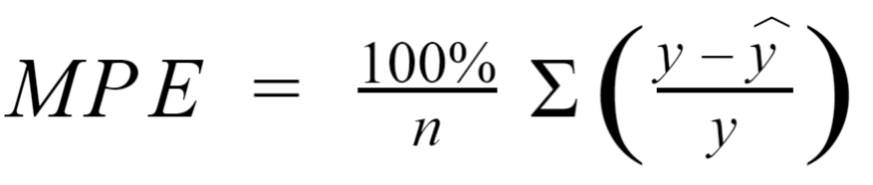

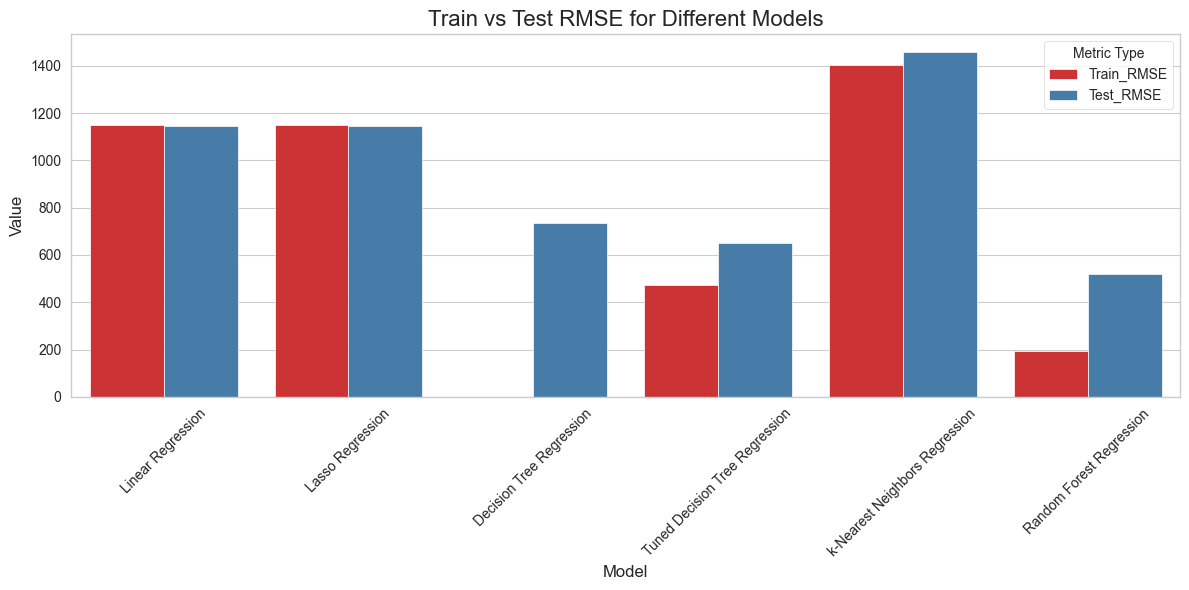

In [123]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")

sns.barplot(x='Model', y='Value', hue='Metric_Type', data=score_df_melted_rmse)

plt.title('Train vs Test RMSE for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric Type')

plt.tight_layout()
plt.show()

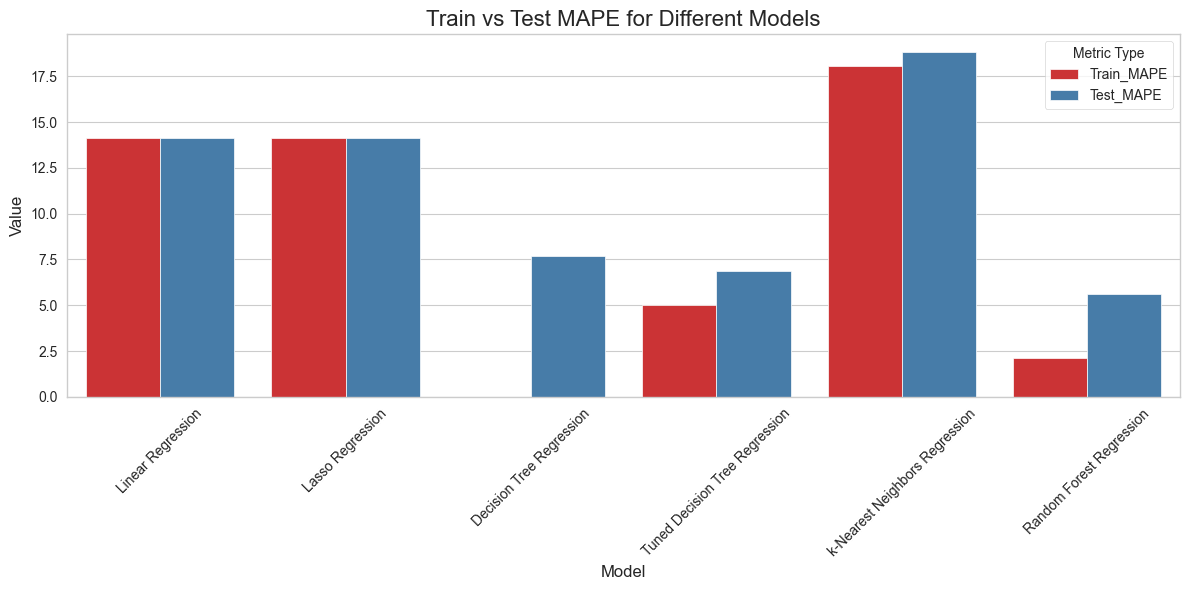

In [124]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")

sns.barplot(x='Model', y='Value', hue='Metric_Type', data=score_df_melted_mape)

plt.title('Train vs Test MAPE for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric Type')

plt.tight_layout()
plt.show()

In [127]:
test

,id,store,dayofweek,date,open,promo,stateholiday,schoolholiday,storetype,assortment,competitiondistance,promo2
0,1,1,4,2015-09-17,1,1,d,0,c,a,1270.0,0
1,2,3,4,2015-09-17,1,1,d,0,a,a,14130.0,1
2,3,7,4,2015-09-17,1,1,d,0,a,c,24000.0,0
3,4,8,4,2015-09-17,1,1,d,0,a,a,7520.0,0
4,5,9,4,2015-09-17,1,1,d,0,a,c,2030.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,d,0,a,a,1900.0,1
41084,41085,1112,6,2015-08-01,1,0,d,0,c,c,1880.0,0
41085,41086,1113,6,2015-08-01,1,0,d,0,a,c,9260.0,0
41086,41087,1114,6,2015-08-01,1,0,d,0,a,c,870.0,0


In [ ]:
store_test_processed = test.copy()

customers_median = store_train['customers'].median()
store_test_processed['customers'] = customers_median
store_test_processed['customers'] = store_test_processed['customers'].astype(int)

store_test_processed.drop('stateholiday', inplace=True, axis=1)

store_test_processed['date'] = pd.to_datetime(store_test_processed['date'])
store_test_processed['year'] = store_test_processed['date'].apply(lambda x: x.year)
store_test_processed['month'] = store_test_processed['date'].apply(lambda x: x.month)
store_test_processed['day'] = store_test_processed['date'].apply(lambda x: x.day)
store_test_processed['weekofyear'] = store_test_processed['date'].apply(lambda x: x.weekofyear)

store_test_processed.drop(['year', 'open', 'date', 'store'], axis=1, inplace=True)

store_test_processed = pd.get_dummies(store_test_processed, columns=['storetype', 'assortment'], drop_first=True)

store_types = ['storetype_a', 'storetype_b', 'storetype_c', 'storetype_d']
assortments = ['assortment_a', 'assortment_b', 'assortment_c']

for col in store_types + assortments:
    if col in store_test_processed.columns:
        store_test_processed[col] = store_test_processed[col].replace({True: 1, False: 0})

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_99967/173882841.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  store_test_processed[col] = store_test_processed[col].replace({True: 1, False: 0})


In [130]:
store_test_processed

,id,dayofweek,promo,schoolholiday,competitiondistance,promo2,customers,month,day,weekofyear,storetype_b,storetype_c,storetype_d,assortment_b,assortment_c
0,1,4,1,0,1270.0,0,609,9,17,38,0,1,0,0,0
1,2,4,1,0,14130.0,1,609,9,17,38,0,0,0,0,0
2,3,4,1,0,24000.0,0,609,9,17,38,0,0,0,0,1
3,4,4,1,0,7520.0,0,609,9,17,38,0,0,0,0,0
4,5,4,1,0,2030.0,0,609,9,17,38,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,6,0,0,1900.0,1,609,8,1,31,0,0,0,0,0
41084,41085,6,0,0,1880.0,0,609,8,1,31,0,1,0,0,1
41085,41086,6,0,0,9260.0,0,609,8,1,31,0,0,0,0,1
41086,41087,6,0,0,870.0,0,609,8,1,31,0,0,0,0,1


In [131]:
missing_columns = ['storetype_a', 'assortment_a']

for col in missing_columns:
    if col not in store_test_processed.columns:
        store_test_processed[col] = 0

In [132]:
store_test_processed

,id,dayofweek,promo,schoolholiday,competitiondistance,promo2,customers,month,day,weekofyear,storetype_b,storetype_c,storetype_d,assortment_b,assortment_c,storetype_a,assortment_a
0,1,4,1,0,1270.0,0,609,9,17,38,0,1,0,0,0,0,0
1,2,4,1,0,14130.0,1,609,9,17,38,0,0,0,0,0,0,0
2,3,4,1,0,24000.0,0,609,9,17,38,0,0,0,0,1,0,0
3,4,4,1,0,7520.0,0,609,9,17,38,0,0,0,0,0,0,0
4,5,4,1,0,2030.0,0,609,9,17,38,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,6,0,0,1900.0,1,609,8,1,31,0,0,0,0,0,0,0
41084,41085,6,0,0,1880.0,0,609,8,1,31,0,1,0,0,1,0,0
41085,41086,6,0,0,9260.0,0,609,8,1,31,0,0,0,0,1,0,0
41086,41087,6,0,0,870.0,0,609,8,1,31,0,0,0,0,1,0,0


In [133]:
rdfreg = joblib.load('Random Forest Regression_model.pkl')
y_pred = rdfreg.predict(store_test_processed)

y_pred_rounded = y_pred.round().astype(int)

submission = pd.DataFrame({
    'Id': store_test_processed['id'], 
    'Sales': y_pred_rounded
})

submission.to_csv('sample_submission.csv', index=False)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
